# Assignment 3 - Pandas your Data

Using what you have learned about the Pandas data analysis library, now it is time to use your PANDAS power to manipulate your data. The goal of this assignment is to do the same analysis you performed for assignment 2, but this time instead of using pure Python, use PANDAS power!!!

Replicate, as best you can given the differences between pure Python and Pandas, the previous analysis. 

## Assignment Structure

### Part 1 & 2: Load and parse your data into Python

* Load your data into a dataframe using the `read_csv()` function.
* If you have dates you might want to parse them and set them as the index using the `index_col` and `parse_dates` arguments to `read_csv()` (see my examples from class).
* If your data are split over multiple files, you should merge them into a single dataframe.
 

### Part 3: Processing your data

* Use Pandas functions to perform the following analyses:
  * Select text based column and use [vectorized string operations](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html) to transform the values.
  * Select a categorical column and count the number of categorical values.
  * Select a numerical column and calculate the average value (or other mathematical aggregation if average doesn't make sense).
* If none of these processing steps make sense for your data ***email me*** with some alternative suggestions.

### Narrative

* Use headings to distinguish each of the different parts of the story you are telling about your data. Add descriptive markdown that discusses your data and the Python operations you are performing.
* Include Markdown cells in-between your code cells that describe what you are doing, any challenges you faced, or other contextual information about your code.
* For part three, reflect upon the the calculations you performed (counting categorical variables, computing averages, etc. )
* Use Pandas plotting to create a **data visualization** of some part of your dataset. Write about what you think the graph is saying about the data.


## Logistics

* This assignment is due at midnight on **July 20th.**
* Please email me your notebook with the narrative, code, and executed outputs. I don't need the data because I want to *read* your notebooks not execute them.

## Part 1 & 2: Load and parse your data into Python

I realized my **Part 1 & 2** is long and messy. I am going to break it down here.

 1. Read data directly from zipped file.
 2. Explore the data -- dimensions, keys and so on.
 3. Merge Rentals and Stations data to 2 data frames, where Rentals as the actual data and stations as the dictionary.
  - I sort of did the data cleaning here since I found out the data is dirty. The mapping of Rentals to Stations does not match. And they clearly used some other kind of mapping to make station data of the Rentals file. 
 4. Parse Trip id as the index of Rentals. Parse Station # as the index of Stations
 
\*Although it says `"If your data are split over multiple files, you should merge them into a single dataframe."` I think it works better for my data to be in 2 seperate dataframes.  
\*Although I have datatime data in Rentals dataframe, but I have a better index available here `trip id`, which is unique.

### 1. Read data directly from zipped file.

In [2]:
# import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
import sys

p = print

#### Read Zipped files to Pandas DataFrame

In [3]:
## generate file names to loop through 
# create year for 2015,2016,2017,2018
data_year = []
for i in range (2015,2019):
    #p(i)
    data_year.append(str(i))

# create quarter for Q1,Q2,Q3,Q4
data_quarter = []
for i in range (1,5):
    data_quarter.append("Q"+str(i))

Following cell is inspired by this [StackOverflow](https://stackoverflow.com/questions/44575251/reading-multiple-files-contained-in-a-zip-file-with-pandas) page. I can use `pd.read_csv(ZipFile.open(filename))` to open zip file. Following cell can open a zip file that zipped multiple files in it.

`read_csv()` function is used below at line 14

In [4]:
dfs = {}
for year in data_year:
    for quarter in data_quarter:
        if (year == r"2015" and quarter == r'Q1'):
                continue     # no data for 2015 Q1 and 2018 Q2/Q3/Q4
        elif(year == r"2018" and quarter in [r'Q2',r'Q3',r'Q4']):
                continue    # no data for 2018 Q2/Q3/Q4
        zip_file = ZipFile("../Homework 2/data/" + year + "-" + quarter + ".zip")
        # parse data to dict with dictionary comprehensive
        # dfs will hold a dictionary of dictionaries by year and quarter. The structures goes like below:
        # 
        # dfs -> year+quarter -> rental or stations
        #
        dfs[year +"-"+ quarter] = { ("Rentals" if csv_file.filename.find("Rental")!=-1 else "Stations") : pd.read_csv(zip_file.open(csv_file.filename))
               for csv_file in zip_file.infolist()
               if csv_file.filename.endswith('.csv')}
    

The returned `dfs` is a dictionary.
It is a dictionary of dictionary of data frames. It is explained in the next section.

### 2. Explore the data 

#### Verifying parsed data

In [5]:
# get data dimension
Rental_length_total=0
p('{:<8} {:<9} {}'.format('dfs','dfs[item]','dataframes inside'))
p('{:<8} {:<9} {}'.format('(dict)','(dict)','(dataframe)'))
for item in dfs:
    for key in dfs[item]:
        p('{:<8} {:<9} {}'.format(item,key,str((dfs[item][key]).shape)))
        if key == "Rentals":
            Rental_length_total += dfs[item][key].shape[0]
p(Rental_length_total)

dfs      dfs[item] dataframes inside
(dict)   (dict)    (dataframe)
2015-Q2  Rentals   (9198, 10)
2015-Q2  Stations  (50, 5)
2015-Q3  Rentals   (38007, 10)
2015-Q3  Stations  (50, 5)
2015-Q4  Rentals   (15100, 10)
2015-Q4  Stations  (50, 5)
2016-Q1  Rentals   (9841, 10)
2016-Q1  Stations  (50, 5)
2016-Q2  Rentals   (26370, 10)
2016-Q2  Stations  (50, 5)
2016-Q3  Rentals   (28841, 10)
2016-Q3  Stations  (50, 5)
2016-Q4  Rentals   (11322, 10)
2016-Q4  Stations  (50, 5)
2017-Q1  Rentals   (7224, 10)
2017-Q1  Stations  (52, 5)
2017-Q2  Rentals   (24313, 10)
2017-Q2  Stations  (52, 5)
2017-Q3  Rentals   (27706, 10)
2017-Q3  Stations  (52, 5)
2017-Q4  Rentals   (11647, 10)
2017-Q4  Stations  (52, 5)
2018-Q1  Rentals   (5186, 10)
2018-Q1  Stations  (52, 5)
214755


In [6]:
#let's see what's in the dfs
p('dfs: ', dfs.keys()) #keys of dfs
[dfs[items].keys() for items in dfs] #keys of dfs.keys
#dfs

dfs:  dict_keys(['2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1'])


[dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations']),
 dict_keys(['Rentals', 'Stations'])]

In [7]:
# let's see what's in 2015-Q4 rentals data
dfs['2015-Q4']['Rentals']

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,14321596,10/1/2015 0:22,10/1/2015 0:32,70374,572,1035,Fifth Ave & S Dithridge St,1038,Boulevard of the Allies & Parkview Ave,Subscriber
1,14321781,10/1/2015 0:46,10/1/2015 0:52,70283,363,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1017,21st St & Penn Ave,Customer
2,14321885,10/1/2015 0:57,10/1/2015 1:02,70068,303,1037,Frew St & Schenley Dr,1038,Boulevard of the Allies & Parkview Ave,Subscriber
3,14324479,10/1/2015 3:01,10/1/2015 3:08,70031,411,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Customer
4,14327116,10/1/2015 5:29,10/1/2015 5:33,70075,261,1047,S 22nd St & E Carson St,1049,S 12th St & E Carson St,Subscriber
5,14327205,10/1/2015 5:34,10/1/2015 5:44,70401,611,1049,S 12th St & E Carson St,1000,Liberty Ave & Stanwix St,Subscriber
6,14328412,10/1/2015 6:38,10/1/2015 6:46,70383,431,1029,Alder St & S Highland Ave,1023,Liberty Ave & Baum Blvd,Subscriber
7,14328920,10/1/2015 7:01,10/1/2015 7:24,70312,1370,1025,Penn Ave & N Fairmount St,1001,Forbes Ave & Market Square,Customer
8,14329359,10/1/2015 7:18,10/1/2015 7:31,70145,778,1049,S 12th St & E Carson St,1006,Ross St & Sixth Ave (Steel Plaza T Station),Subscriber
9,14329527,10/1/2015 7:25,10/1/2015 7:34,70426,593,1048,S 18th St & Sidney St,1006,Ross St & Sixth Ave (Steel Plaza T Station),Subscriber


So, dfs contains year and quarters as keys.  
in the next level, every keys of dfs contains 2 dataframes: Rentals and Stations.

### 3. Merge Rentals and Stations data files to 2 data frames

##### Check the "Station" data consistency

Stations data should be the same for all quarters. And only with 2 additional stations starts from 2017-Q1. But if the rest station information are the same, I should be able to merge them and to create one single stations python dataframe as "real dictionary". 

I will start making the python dataframe by checking the station num and use this column as the index column of the dataframe.

In [8]:
df_stationNum = pd.DataFrame()
for key,value in (dfs.items()):
    for name, column in (value.get("Stations").iteritems()):
        if name in ['StationNum','Station #']: # the naming is different for data after 2017-Q1
            df_stationNum = pd.concat([df_stationNum,column.rename(key+" StationNum")],axis = 1)
            

In [9]:
df_stationNum

,2015-Q2 StationNum,2015-Q3 StationNum,2015-Q4 StationNum,2016-Q1 StationNum,2016-Q2 StationNum,2016-Q3 StationNum,2016-Q4 StationNum,2017-Q1 StationNum,2017-Q2 StationNum,2017-Q3 StationNum,2017-Q4 StationNum,2018-Q1 StationNum
0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000,1000,1000,1000,1000
1,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001,1001,1001,1001,1001
2,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002,1002,1002,1002,1002
3,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003.0,1003,1003,1003,1003,1003
4,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004,1004,1004,1004,1004
5,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,1005,1005,1005,1005,1005
6,1006.0,1006.0,1006.0,1006.0,1006.0,1006.0,1006.0,1006,1006,1006,1006,1006
7,1007.0,1007.0,1007.0,1007.0,1007.0,1007.0,1007.0,1007,1007,1007,1007,1007
8,1008.0,1008.0,1008.0,1008.0,1008.0,1008.0,1008.0,1008,1008,1008,1008,1008
9,1009.0,1009.0,1009.0,1009.0,1009.0,1009.0,1009.0,1009,1009,1009,1009,1009


In [10]:
#check if df_stationNum has any duplicates in columns by using duplicated on its transpose.
df_stationNum.T.duplicated()

2015-Q2 StationNum    False
2015-Q3 StationNum     True
2015-Q4 StationNum     True
2016-Q1 StationNum     True
2016-Q2 StationNum     True
2016-Q3 StationNum     True
2016-Q4 StationNum     True
2017-Q1 StationNum    False
2017-Q2 StationNum     True
2017-Q3 StationNum     True
2017-Q4 StationNum     True
2018-Q1 StationNum     True
dtype: bool

The result is expected. 2 Falses for 2015-Q2 and 2017-Q1.  
2015-Q2 is the first column which should be false.  
2017-Q1 has 2 additional rows than before. 

Let's check if 2015-Q2 is entirely contained in the 2017-Q1. 

The station num containment relationship is verified by checking if "2015-Q2 StationNum" is the subset of "2017-Q1 StationNum". To do that I transfer those 2 column into np arrays and do substraction to see if all results are 0.

In [11]:
# ().values: convert the returned dataframe to np array
# and do substraction of 2 arrays, which should return all 0 and 2 nan for additional 2 values.-- temp
# Errase nan by ~np.isnan() -- temp2
# any() function return True if anything in the array is true (1) so in this case, it should return false.

temp = (df_stationNum.loc[:,['2017-Q1 StationNum']].values - df_stationNum.loc[:,['2015-Q2 StationNum']])
temp2 = temp.values[~np.isnan((temp).values)]
p(temp2.any(),len(temp2)) # return false is expected



False 50


So the returned results above shows it has 50 falses -- 50 0s, which shows 2015-Q2 is entirely contained in 2017-Q1. I am now ready to use this column as the index column. 

Now we have the index of the dictionary. Let's look at the columns.

In [12]:
# let's check what columns name does each station data use.
for df in dfs:
    p(df,list(dfs[df]['Stations']))

2015-Q2 ['StationNum', 'StationName', 'RackQnty', 'Latitude', 'Longitude']
2015-Q3 ['StationNum', 'StationName', 'RackQnty', 'Latitude', 'Longitude']
2015-Q4 ['StationNum', 'StationName', 'RackQnty', 'Latitude', 'Longitude']
2016-Q1 ['StationNum', 'StationName', 'RackQnty', 'Latitude', 'Longitude']
2016-Q2 ['StationNum', 'StationName', 'RackQnty', 'Latitude', 'Longitude']
2016-Q3 ['Station #', 'Station Name', '# of Racks', 'Latitude', 'Longitude']
2016-Q4 ['Station #', 'Station Name', '# of Racks', 'Latitude', 'Longitude']
2017-Q1 ['Station #', 'Station Name', '# of Racks', 'Latitude', 'Longitude']
2017-Q2 ['Station #', 'Station Name', '# of Racks', 'Latitude', 'Longitude']
2017-Q3 ['Station #', 'Station Name', '# of Racks', 'Latitude', 'Longitude']
2017-Q4 ['Station #', 'Station Name', '# of Racks', 'Latitude', 'Longitude']
2018-Q1 ['Station #', 'Station Name', '# of Racks', 'Latitude', 'Longitude']


So the naming conversion of the columns changed after 2016-Q3, But the data are the same. Station # is the same as StaionNum. and RackQnty is # of Racks. StationName hs an extra space between Station and Name. But let's look at the data to double check. I will display 2015-Q2 and 2016-Q3 for comparison. 

In [13]:
p("StationNum:",(dfs['2015-Q2']['Stations']['StationNum']==dfs['2016-Q3']['Stations']['Station #']).all())
p("RackQnty:",(dfs['2015-Q2']['Stations']['RackQnty']==dfs['2016-Q3']['Stations']['# of Racks']).all())
p("StationName:",(dfs['2015-Q2']['Stations']['StationName']==dfs['2016-Q3']['Stations']['Station Name']).all())

StationNum: True
RackQnty: False
StationName: False


We can see that Rack Qnty does not stays the same for these 2 quarters. Neither does Station name.

I am going to check each column for duplicates files by files.

The function below is already modified for checking step by step. The drop1, and drop2 parameters are used to set to check if data is duplicated by parts. Look at next markdown cell for explanation.

In [14]:
# check_duplicate function
# \parm: column_in: the column I want to check
#        drop1:     drop first 5 rows until 2016-Q2
#        drop2:     drop next 2 rows until 2016-Q4
def check_duplicate(column_in,drop1,drop2):
    df_temp = pd.DataFrame()
    for key,value in (dfs.items()):
        for name, column in (value.get("Stations").iteritems()):
            if name in column_in: 
                df_temp = pd.concat([df_temp,column.rename(key)],axis = 1)
                
    if drop1 == 'T':
        if drop2 == 'T':
            return df_temp.T.drop(['2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2','2016-Q3','2016-Q4']).duplicated() 
        return df_temp.T.drop(['2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2']).duplicated()   
    else:
        return df_temp.T.duplicated() 

In [15]:
drop1 = "F"
drop2 = "F"

dup_station_name = check_duplicate(["StationName","Station Name"],drop1,drop2).rename("StationName")
dup_rack_qnty = check_duplicate(["RackQnty", "# of Racks"],drop1,drop2).rename("RackQnty")
dup_la = check_duplicate(["Latitude"],drop1,drop2).rename("Latitude")
dup_long = check_duplicate(["Longitude"],drop1,drop2).rename("Longtitude")

pd.concat([dup_station_name, dup_rack_qnty, dup_la, dup_long], axis=1)

,StationName,RackQnty,Latitude,Longtitude
2015-Q2,False,False,False,False
2015-Q3,True,True,True,True
2015-Q4,True,True,True,True
2016-Q1,True,True,True,True
2016-Q2,True,True,True,True
2016-Q3,False,False,False,False
2016-Q4,True,True,True,True
2017-Q1,False,False,False,False
2017-Q2,True,True,True,True
2017-Q3,True,True,True,True


As we can see, the output shows the data is different from 2016-Q3 and 2017-Q1. I want to know if 2016-Q4 is duplicates of 2016-Q3 or others. (if they record the data by mistakes.) So I am going to drop first 5 columns then do the check duplicates. The drop parameter in the defined function above is for this purpose.

In [16]:
drop1 = "T"
drop2 = "F"

dup_station_name = check_duplicate(["StationName","Station Name"],drop1,drop2).rename("StationName")
dup_rack_qnty = check_duplicate(["RackQnty", "# of Racks"],drop1,drop2).rename("RackQnty")
dup_la = check_duplicate(["Latitude"],drop1,drop2).rename("Latitude")
dup_long = check_duplicate(["Longitude"],drop1,drop2).rename("Longtitude")

pd.concat([dup_station_name, dup_rack_qnty, dup_la, dup_long], axis=1)

,StationName,RackQnty,Latitude,Longtitude
2016-Q3,False,False,False,False
2016-Q4,True,True,True,True
2017-Q1,False,False,False,False
2017-Q2,True,True,True,True
2017-Q3,True,True,True,True
2017-Q4,True,True,True,True
2018-Q1,True,True,True,True


So 2016-Q4 is duplicates of 2016-Q3. And let's drop these 2 rows see if the rest rows are the same.

In [17]:
drop1 = "T"
drop2 = "T"

dup_station_name = check_duplicate(["StationName","Station Name"],drop1,drop2).rename("StationName")
dup_rack_qnty = check_duplicate(["RackQnty", "# of Racks"],drop1,drop2).rename("RackQnty")
dup_la = check_duplicate(["Latitude"],drop1,drop2).rename("Latitude")
dup_long = check_duplicate(["Longitude"],drop1,drop2).rename("Longtitude")

pd.concat([dup_station_name, dup_rack_qnty, dup_la, dup_long], axis=1)

,StationName,RackQnty,Latitude,Longtitude
2017-Q1,False,False,False,False
2017-Q2,True,True,True,True
2017-Q3,True,True,True,True
2017-Q4,True,True,True,True
2018-Q1,True,True,True,True


So the rest of the data are the same. I am going to do another check as before, see if the data prior of 2017-Q1 is entirely contained in the 2017-Q1.  
I am going to do it with 2 steps, check with both 2015-Q2 and 2016-Q3 for .isin() function.

In [18]:
dfs["2016-Q2"]["Stations"][~dfs["2016-Q2"]["Stations"].isin(dfs["2017-Q1"]["Stations"])].dropna(how='all')

,StationNum,StationName,RackQnty,Latitude,Longitude
0,1000,Liberty & Stanwix,16,NaN,NaN
1,1001,Forbes Ave & Market Sq,19,NaN,NaN
2,1002,Third & Wood,15,NaN,NaN
3,1003,First Ave & Smithfield St,15,NaN,NaN
4,1004,First Ave & B St,15,40.435800,-79.996877
5,1005,Forbes Ave & Grant St,19,40.438777,-79.997440
6,1006,Ross St & Sixth Ave,21,40.440054,-79.995138
7,1007,Stevenson St & Forbes Ave,19,NaN,NaN
8,1008,Centre Ave and Consol,35,NaN,NaN
9,1009,12th St & Penn Ave,19,NaN,NaN


In [19]:
dfs["2016-Q4"]["Stations"][~dfs["2016-Q4"]["Stations"].isin(dfs["2017-Q1"]["Stations"])].dropna(how='all')

,Station #,Station Name,# of Racks,Latitude,Longitude
40,NaN,Bigelow Blvd & Fifth Ave,NaN,40.444708,-79.955025


First, apparently 2017-Q1 data added 2 additional rows from 2016-Q3 and 2016-Q4 versions of data.
But second, the 40th row of 2016-Q4 data is not contained in the 2017-Q1. Let's see what the data is for this row.

In [20]:
dfs["2017-Q2"]["Rentals"][dfs["2017-Q2"]["Rentals"]["From station name"]=="Bigelow Blvd & Fifth Ave"]

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


In [21]:
p(dfs["2016-Q4"]["Stations"].loc[40])
p(dfs["2017-Q1"]["Stations"].loc[40])

Station #                           1040
Station Name    Bigelow Blvd & Fifth Ave
# of Racks                            21
Latitude                         40.4447
Longitude                        -79.955
Name: 40, dtype: object
Station #                                                    1040
Station Name    O'Hara St and University Place (Soldiers and S...
# of Racks                                                     21
Latitude                                                  40.4451
Longitude                                                -79.9571
Name: 40, dtype: object


So I doubt somehow this bike station changed its position with the same station number. And I was able to find a pdf version of [HealthyRide Station map back in 2015/03](https://healthyridepgh.com/wp-content/uploads/sites/3/2015/03/HR_Map.pdf). And according to this map, back in time the station with number was definitely on the Fifth Ave. (not clear to see if it is at the Bigelow blvd.)

What I was going to do is to give the one has station name "O'Hara St and University Place" a new number. However, when I took a peek at Rentals data (just out of curiosity), I found out, all of the station name with station number "1040" are "O'Hara St and University Place". The data is Dirty! See below.

In [22]:
# showing rows with name: Bigelow Blvd & Fifth Ave.
for quarter in dfs:
    display(dfs[quarter]["Rentals"][dfs[quarter]["Rentals"]["To station name"]=="Bigelow Blvd & Fifth Ave"])
p()
# showing rows with id: 1040
for quarter in dfs:
    display(dfs[quarter]["Rentals"][dfs[quarter]["Rentals"]["From station id"]==1040])
    

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
4651,11313229,6/17/2015 16:16,6/17/2015 16:27,70098,652,1040,O'Hara St and University Place (Soldiers and S...,1034,Ellsworth Ave & N Neville St,Customer
4656,11313503,6/17/2015 16:28,6/17/2015 16:44,70479,948,1040,O'Hara St and University Place (Soldiers and S...,1033,Ivy St & Walnut St,Customer
4658,11313580,6/17/2015 16:33,6/17/2015 16:46,70425,806,1040,O'Hara St and University Place (Soldiers and S...,1024,S Negley Ave & Baum Blvd,Customer
4708,11315091,6/17/2015 18:06,6/17/2015 18:17,70120,662,1040,O'Hara St and University Place (Soldiers and S...,1033,Ivy St & Walnut St,Customer
4795,11317861,6/18/2015 1:32,6/18/2015 2:01,70267,1707,1040,O'Hara St and University Place (Soldiers and S...,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,Customer
4829,11329319,6/18/2015 8:54,6/18/2015 9:02,70499,504,1040,O'Hara St and University Place (Soldiers and S...,1039,Atwood St & Bates St,Customer
4917,11344053,6/18/2015 15:17,6/18/2015 15:28,70069,675,1040,O'Hara St and University Place (Soldiers and S...,1033,Ivy St & Walnut St,Subscriber
4967,11347337,6/18/2015 18:12,6/18/2015 18:25,70228,805,1040,O'Hara St and University Place (Soldiers and S...,1033,Ivy St & Walnut St,Subscriber
5378,11388148,6/20/2015 9:39,6/20/2015 9:48,70120,560,1040,O'Hara St and University Place (Soldiers and S...,1023,Liberty Ave & Baum Blvd,Subscriber
5742,11423809,6/21/2015 13:23,6/21/2015 13:58,70154,2082,1040,O'Hara St and University Place (Soldiers and S...,1049,S 12th St & E Carson St,Subscriber


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
46,11729827,7/1/2015 9:34,7/1/2015 9:37,70189,183,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
71,11733911,7/1/2015 11:16,7/1/2015 11:31,70233,911,1040,O'Hara St and University Place (Soldiers and S...,1031,Maryland Ave & Ellsworth Ave,Customer
166,11747198,7/1/2015 15:41,7/1/2015 15:47,70382,358,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Subscriber
200,11749048,7/1/2015 16:47,7/1/2015 16:48,70382,81,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Subscriber
234,11749915,7/1/2015 17:27,7/1/2015 17:38,70220,637,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
235,11749936,7/1/2015 17:28,7/1/2015 17:38,70323,580,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
237,11749960,7/1/2015 17:30,7/1/2015 17:38,70189,486,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Subscriber
239,11750009,7/1/2015 17:32,7/1/2015 17:43,70164,683,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Subscriber
305,11751366,7/1/2015 19:02,7/1/2015 19:16,70308,862,1040,O'Hara St and University Place (Soldiers and S...,1032,Walnut St & College St,Subscriber
309,11751430,7/1/2015 19:09,7/1/2015 19:59,70164,3000,1040,O'Hara St and University Place (Soldiers and S...,1041,Fifth Ave & S Bouquet St,Customer


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
3,14324479,10/1/2015 3:01,10/1/2015 3:08,70031,411,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Customer
43,14332766,10/1/2015 9:24,10/1/2015 9:47,70309,1364,1040,O'Hara St and University Place (Soldiers and S...,1028,Penn Ave & Putnam St (Bakery Square),Subscriber
54,14334918,10/1/2015 10:22,10/1/2015 10:29,70100,386,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Subscriber
97,14341024,10/1/2015 12:57,10/1/2015 13:06,70478,539,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Subscriber
114,14342478,10/1/2015 13:59,10/1/2015 14:16,70044,1046,1040,O'Hara St and University Place (Soldiers and S...,1020,42nd & Penn Ave.,Subscriber
161,14344430,10/1/2015 16:14,10/1/2015 16:27,70048,745,1040,O'Hara St and University Place (Soldiers and S...,1023,Liberty Ave & Baum Blvd,Subscriber
197,14345028,10/1/2015 17:13,10/1/2015 17:45,70374,1948,1040,O'Hara St and University Place (Soldiers and S...,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,Subscriber
225,14345452,10/1/2015 17:57,10/1/2015 18:19,70431,1323,1040,O'Hara St and University Place (Soldiers and S...,1025,Penn Ave & N Fairmount St,Subscriber
285,14346424,10/1/2015 21:18,10/1/2015 21:23,70474,266,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Subscriber
288,14346441,10/1/2015 21:25,10/1/2015 21:42,70386,1027,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Subscriber


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
70,15340586,1/3/2016 13:06,1/3/2016 13:10,70344,192,1040,O'Hara St and University Place (Soldiers and S...,1041,Fifth Ave & S Bouquet St,Subscriber
133,15347230,1/5/2016 14:09,1/5/2016 14:16,70257,420,1040,O'Hara St and University Place (Soldiers and S...,1034,Ellsworth Ave & N Neville St,Subscriber
150,15347629,1/5/2016 17:35,1/5/2016 17:41,70338,382,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Subscriber
153,15347829,1/5/2016 19:32,1/5/2016 19:37,70474,293,1040,O'Hara St and University Place (Soldiers and S...,1039,Atwood St & Bates St,Subscriber
172,15350783,1/6/2016 12:30,1/6/2016 12:36,70409,315,1040,O'Hara St and University Place (Soldiers and S...,1039,Atwood St & Bates St,Subscriber
181,15351369,1/6/2016 15:19,1/6/2016 15:39,70411,1217,1040,O'Hara St and University Place (Soldiers and S...,1031,Maryland Ave & Ellsworth Ave,Subscriber
182,15351378,1/6/2016 15:21,1/6/2016 15:39,70388,1113,1040,O'Hara St and University Place (Soldiers and S...,1031,Maryland Ave & Ellsworth Ave,Customer
183,15351383,1/6/2016 15:22,1/6/2016 15:39,70473,1037,1040,O'Hara St and University Place (Soldiers and S...,1031,Maryland Ave & Ellsworth Ave,Subscriber
184,15351432,1/6/2016 15:50,1/6/2016 16:09,70237,1159,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Subscriber
189,15351533,1/6/2016 16:48,1/6/2016 16:53,70263,301,1040,O'Hara St and University Place (Soldiers and S...,1039,Atwood St & Bates St,Subscriber


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
6,15965306,4/1/2016 1:46,4/1/2016 1:49,70412,178,1040,O'Hara St and University Place (Soldiers and S...,1035,Fifth Ave & S Dithridge St,Customer
40,15975665,4/1/2016 11:08,4/1/2016 11:18,70110,602,1040,O'Hara St and University Place (Soldiers and S...,1043,S Millvale Ave & Centre Ave,Subscriber
67,15979484,4/1/2016 13:12,4/1/2016 14:53,70027,6050,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
68,15979496,4/1/2016 13:13,4/1/2016 14:56,70129,6174,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
69,15979586,4/1/2016 13:16,4/1/2016 14:54,70396,5848,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
70,15979777,4/1/2016 13:23,4/1/2016 14:56,70319,5578,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
75,15980313,4/1/2016 13:48,4/1/2016 14:03,70270,900,1040,O'Hara St and University Place (Soldiers and S...,1021,Taylor St & Liberty Ave,Customer
109,15982343,4/1/2016 15:57,4/1/2016 16:16,70319,1176,1040,O'Hara St and University Place (Soldiers and S...,1029,Alder St & S Highland Ave,Subscriber
197,15984284,4/1/2016 19:35,4/1/2016 19:47,70092,726,1040,O'Hara St and University Place (Soldiers and S...,1023,Liberty Ave & Baum Blvd,Customer
207,15984579,4/1/2016 20:19,4/1/2016 20:25,70046,380,1040,O'Hara St and University Place (Soldiers and S...,1043,S Millvale Ave & Centre Ave,Subscriber


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
60,20241225,7/1/2016 10:20,7/1/2016 10:27,70259,447,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Customer
195,20261068,7/1/2016 15:52,7/1/2016 16:06,70426,865,1040,O'Hara St and University Place (Soldiers and S...,1032,Walnut St & College St,Customer
539,20295980,7/2/2016 13:24,7/2/2016 13:36,70203,690,1040,O'Hara St and University Place (Soldiers and S...,1034,Ellsworth Ave & N Neville St,Customer
542,20296080,7/2/2016 13:26,7/2/2016 13:35,70461,535,1040,O'Hara St and University Place (Soldiers and S...,1034,Ellsworth Ave & N Neville St,Subscriber
617,20298773,7/2/2016 14:17,7/2/2016 14:31,70351,854,1040,O'Hara St and University Place (Soldiers and S...,1032,Walnut St & College St,Subscriber
795,20306715,7/2/2016 18:45,7/2/2016 19:35,70080,2992,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
1752,20420179,7/5/2016 10:31,7/5/2016 10:38,70025,401,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Customer
1848,20443631,7/5/2016 18:09,7/6/2016 16:38,70295,80978,1040,O'Hara St and University Place (Soldiers and S...,1013,Isabella St & Federal St (PNC Park),Customer
1994,20467796,7/6/2016 10:46,7/6/2016 10:54,70487,470,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Customer
2077,20480367,7/6/2016 16:29,7/6/2016 16:40,70027,664,1040,O'Hara St and University Place (Soldiers and S...,1023,Liberty Ave & Baum Blvd,Subscriber


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
538,24498628,10/3/2016 11:35,10/3/2016 12:16,70365,2439,1040,O'Hara St and University Place (Soldiers and S...,1045,S 27th St & Sidney St. (Southside Works),Customer
565,24501590,10/3/2016 14:01,10/3/2016 14:14,70391,793,1040,O'Hara St and University Place (Soldiers and S...,1041,Fifth Ave & S Bouquet St,Subscriber
797,24533030,10/4/2016 13:59,10/4/2016 14:15,70355,973,1040,O'Hara St and University Place (Soldiers and S...,1029,Alder St & S Highland Ave,Subscriber
815,24534887,10/4/2016 15:32,10/4/2016 15:59,70241,1577,1040,O'Hara St and University Place (Soldiers and S...,1027,Shady Ave & Ellsworth Ave,Customer
816,24534892,10/4/2016 15:33,10/4/2016 15:43,70029,632,1040,O'Hara St and University Place (Soldiers and S...,1039,Atwood St & Bates St,Subscriber
817,24534913,10/4/2016 15:34,10/4/2016 15:57,70027,1412,1040,O'Hara St and University Place (Soldiers and S...,1027,Shady Ave & Ellsworth Ave,Customer
838,24535922,10/4/2016 16:51,10/4/2016 16:56,70008,298,1040,O'Hara St and University Place (Soldiers and S...,1039,Atwood St & Bates St,Subscriber
880,24536586,10/4/2016 17:53,10/4/2016 19:00,70002,3971,1040,O'Hara St and University Place (Soldiers and S...,1043,S Millvale Ave & Centre Ave,Subscriber
927,24537746,10/4/2016 21:58,10/4/2016 22:03,70026,314,1040,O'Hara St and University Place (Soldiers and S...,1039,Atwood St & Bates St,Subscriber
934,24538015,10/5/2016 0:07,10/5/2016 0:18,70112,688,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Subscriber


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
9,25724680,1/1/2017 13:08,1/1/2017 14:43,70109,5683,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
46,25725038,1/1/2017 16:30,1/1/2017 17:44,70013,4419,1040,O'Hara St and University Place (Soldiers and S...,1000,Liberty Ave & Stanwix St,Customer
251,25761459,1/10/2017 12:11,1/10/2017 12:36,70109,1488,1040,O'Hara St and University Place (Soldiers and S...,1050,Healthy Ride Hub,Customer
323,25768973,1/11/2017 22:42,1/11/2017 22:49,70134,401,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Subscriber
336,25772582,1/12/2017 9:59,1/12/2017 10:24,70167,1500,1040,O'Hara St and University Place (Soldiers and S...,1045,S 27th St & Sidney St. (Southside Works),Customer
350,25774188,1/12/2017 13:24,1/12/2017 13:41,70094,1018,1040,O'Hara St and University Place (Soldiers and S...,1019,42nd St & Butler St,Customer
365,25774997,1/12/2017 18:19,1/12/2017 18:25,70417,358,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Subscriber
394,25780116,1/13/2017 15:03,1/13/2017 15:19,70042,955,1040,O'Hara St and University Place (Soldiers and S...,1029,Alder St & S Highland Ave,Customer
491,25793177,1/16/2017 17:50,1/16/2017 18:24,70120,2052,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
558,25799741,1/17/2017 19:50,1/17/2017 19:56,70009,366,1040,O'Hara St and University Place (Soldiers and S...,1038,Boulevard of the Allies & Parkview Ave,Subscriber


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
393,27443852,4/3/2017 19:12,4/3/2017 19:37,70460,1546,1040,O'Hara St and University Place (Soldiers and S...,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,Subscriber
448,27504277,4/4/2017 12:14,4/4/2017 12:38,70040,1450,1040,O'Hara St and University Place (Soldiers and S...,1016,17th St & Penn Ave,Subscriber
633,27603161,4/5/2017 16:29,4/5/2017 16:49,70172,1169,1040,O'Hara St and University Place (Soldiers and S...,1027,Shady Ave & Ellsworth Ave,Customer
851,27689145,4/7/2017 16:46,4/7/2017 16:59,70051,775,1040,O'Hara St and University Place (Soldiers and S...,1041,Fifth Ave & S Bouquet St,Subscriber
963,27740632,4/8/2017 13:35,4/8/2017 14:18,70102,2591,1040,O'Hara St and University Place (Soldiers and S...,1017,21st St & Penn Ave,Customer
965,27740721,4/8/2017 13:36,4/8/2017 14:09,70486,1958,1040,O'Hara St and University Place (Soldiers and S...,1015,Federal St & E North Ave,Customer
1351,27802353,4/9/2017 14:35,4/9/2017 14:48,70215,789,1040,O'Hara St and University Place (Soldiers and S...,1029,Alder St & S Highland Ave,Subscriber
1874,27898139,4/10/2017 18:09,4/10/2017 18:26,70118,987,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Subscriber
1937,27899257,4/10/2017 20:06,4/10/2017 20:12,70118,360,1040,O'Hara St and University Place (Soldiers and S...,1034,Ellsworth Ave & N Neville St,Subscriber
2052,27945536,4/11/2017 15:59,4/11/2017 16:18,70196,1136,1040,O'Hara St and University Place (Soldiers and S...,1027,Shady Ave & Ellsworth Ave,Subscriber


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
131,33341690,7/1/2017 14:05,7/1/2017 15:12,70108,4021,1040,O'Hara St and University Place (Soldiers and S...,1001,Forbes Ave & Market Square,Customer
169,33345072,7/1/2017 15:05,7/1/2017 15:36,70011,1850,1040,O'Hara St and University Place (Soldiers and S...,1016,17th St & Penn Ave,Customer
170,33345090,7/1/2017 15:05,7/1/2017 15:35,70213,1772,1040,O'Hara St and University Place (Soldiers and S...,1016,17th St & Penn Ave,Customer
235,33348678,7/1/2017 16:44,7/1/2017 17:50,70204,3965,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
241,33349202,7/1/2017 17:03,7/1/2017 17:31,70412,1690,1040,O'Hara St and University Place (Soldiers and S...,1006,Ross St & Sixth Ave (Steel Plaza T Station),Customer
631,33398367,7/2/2017 14:39,7/2/2017 14:53,70258,893,1040,O'Hara St and University Place (Soldiers and S...,1023,Liberty Ave & Baum Blvd,Customer
957,33458272,7/3/2017 11:51,7/3/2017 12:26,70204,2054,1040,O'Hara St and University Place (Soldiers and S...,1017,21st St & Penn Ave,Customer
1088,33478047,7/3/2017 14:51,7/3/2017 15:07,70144,963,1040,O'Hara St and University Place (Soldiers and S...,1045,S 27th St & Sidney St. (Southside Works),Subscriber
1205,33488125,7/3/2017 18:41,7/3/2017 18:45,70151,238,1040,O'Hara St and University Place (Soldiers and S...,1034,Ellsworth Ave & N Neville St,Subscriber
1224,33488748,7/3/2017 19:35,7/3/2017 20:49,70454,4480,1040,O'Hara St and University Place (Soldiers and S...,1041,Fifth Ave & S Bouquet St,Customer


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
75,39307040,10/1/2017 12:43,10/1/2017 15:12,70246,8938,1040,O'Hara St and University Place (Soldiers and S...,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,Customer
210,39315397,10/1/2017 17:30,10/1/2017 18:11,70113,2411,1040,O'Hara St and University Place (Soldiers and S...,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,Customer
211,39315426,10/1/2017 17:33,10/1/2017 18:10,70248,2254,1040,O'Hara St and University Place (Soldiers and S...,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,Customer
219,39315725,10/1/2017 17:56,10/1/2017 18:12,70190,997,1040,O'Hara St and University Place (Soldiers and S...,1023,Liberty Ave & Baum Blvd,Customer
221,39315735,10/1/2017 17:56,10/1/2017 18:13,70460,1017,1040,O'Hara St and University Place (Soldiers and S...,1023,Liberty Ave & Baum Blvd,Customer
250,39316755,10/1/2017 20:06,10/1/2017 20:23,70482,1053,1040,O'Hara St and University Place (Soldiers and S...,1027,Shady Ave & Ellsworth Ave,Subscriber
271,39318416,10/2/2017 1:05,10/2/2017 1:20,70057,895,1040,O'Hara St and University Place (Soldiers and S...,1023,Liberty Ave & Baum Blvd,Subscriber
695,39397340,10/3/2017 18:34,10/3/2017 18:49,70105,910,1040,O'Hara St and University Place (Soldiers and S...,1027,Shady Ave & Ellsworth Ave,Subscriber
737,39398492,10/3/2017 23:00,10/3/2017 23:05,70231,321,1040,O'Hara St and University Place (Soldiers and S...,1035,Fifth Ave & S Dithridge St,Customer
747,39402787,10/4/2017 2:11,10/4/2017 2:23,70386,735,1040,O'Hara St and University Place (Soldiers and S...,1024,S Negley Ave & Baum Blvd,Customer


,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
1,41491355,1/2/2018 7:28,1/2/2018 10:25,70213,10575,1040,O'Hara St and University Place (Soldiers and S...,1037,Frew St & Schenley Dr,Subscriber
85,41512661,1/5/2018 13:14,1/5/2018 13:29,70331,894,1040,O'Hara St and University Place (Soldiers and S...,1022,Liberty Ave & S Millvale Ave (West Penn Hospital),Customer
561,41649421,1/22/2018 16:19,1/22/2018 16:36,70183,1003,1040,O'Hara St and University Place (Soldiers and S...,1029,Alder St & S Highland Ave,Subscriber
575,41649703,1/22/2018 17:26,1/22/2018 17:47,70455,1281,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer
732,41679955,1/25/2018 16:20,1/25/2018 16:34,70479,796,1040,O'Hara St and University Place (Soldiers and S...,1022,Liberty Ave & S Millvale Ave (West Penn Hospital),Customer
912,41705062,1/28/2018 17:27,1/28/2018 17:37,70455,614,1040,O'Hara St and University Place (Soldiers and S...,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,Customer
1302,41832512,2/12/2018 11:02,2/12/2018 11:07,70370,280,1040,O'Hara St and University Place (Soldiers and S...,1041,Fifth Ave & S Bouquet St,Customer
1428,41852775,2/14/2018 17:09,2/14/2018 17:16,70435,409,1040,O'Hara St and University Place (Soldiers and S...,1043,S Millvale Ave & Centre Ave,Subscriber
1555,41876948,2/17/2018 13:11,2/17/2018 13:19,70017,533,1040,O'Hara St and University Place (Soldiers and S...,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,Customer
1801,41902962,2/20/2018 14:55,2/20/2018 15:45,70002,2989,1040,O'Hara St and University Place (Soldiers and S...,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,Customer


The returned results show that there is no single station name with "Bigelow Blvd & Fifth Ave". It could because when they make the data, they used later version of the station name to make all Rentals data. Which creates inconsistency of the Rental data to Station data mapping. So what I am going to do are:

* check the rest of the data see if the eariler version of the data is also using later version of the station mapping.
* skip station with id (stationNum) 1040 for all files.

**Check for eariler version of station name usage.**

The following code gets the first data file, 2015-Q2, in "Rentals" and check if it is in the cooresponding station dictionary of 2015-Q2. And then use boolean slicing to output the `~` opposite of the result, that is, all of the station name that is NOT in the station file. I will refer this process as "check for existence" below.

In [23]:
for quarter in dfs:
    p(len(dfs[quarter]["Rentals"][["From station id","From station name"]].drop_duplicates()))
    temp_check_version_of_station_name = (dfs[quarter]["Rentals"][["From station id","From station name"]][~np.isin(dfs[quarter]["Rentals"][["From station id","From station name"]],dfs[quarter]["Stations"][["StationNum","StationName"]])])
    display(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"]))
    p(len(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"])))
#     except KeyError:
#         p(np.isin(dfs[quarter]["Rentals"]["From station name"].unique(),dfs[quarter]["Stations"]["Station Name"]))
    break

50


,From station id,From station name
10,1000,Liberty Ave & Stanwix St
3,1001,Forbes Ave & Market Square
112,1002,Third Ave & Wood St
82,1003,First Ave & Smithfield St (Art Institute)
30,1004,First Ave & B St (T Station)
111,1006,Ross St & Sixth Ave (Steel Plaza T Station)
879,1008,Centre Ave & PPG Paints Arena
6,1010,10th St & Penn Ave (David L. Lawrence Conventi...
208,1011,Fort Duquesne Blvd & 7th St
854,1012,North Shore Trail & Fort Duquesne Bridge


26


As we can see, there is lots of station names that is not in the station file. There are 50 distinct combination of station number and station name before the check for existence. And after the check with `np.isin()`, there are still 26 left. That does not even cover 50% of the data.  
Let's check if this gives a better results in the later version of the station file.

In [24]:
p(len(dfs[quarter]["Rentals"][["From station id","From station name"]][~np.isin(dfs[quarter]["Rentals"][["From station id","From station name"]],dfs["2017-Q1"]["Stations"][['Station #', 'Station Name']])].drop_duplicates()))
updated_temp_check_version_of_station_name = dfs[quarter]["Rentals"][["From station id","From station name"]][~np.isin(dfs[quarter]["Rentals"][["From station id","From station name"]],dfs["2017-Q1"]["Stations"][['Station #', 'Station Name']])].drop_duplicates()
pd.merge(updated_temp_check_version_of_station_name,dfs["2017-Q1"]["Stations"][["Station #","Station Name"]], left_on='From station id',right_on = "Station #")

9


,From station id,From station name,Station #,Station Name
0,1018,Butler St & Stanton Ave,1018,37th St & Butler St
1,1029,Alder St & S Highland Ave,1029,Alder St & S Higland Ave
2,1011,Fort Duquesne Blvd & 7th St,1011,Fort Duquesne Blvd & 7th
3,1039,Atwood St & Bates St,1039,Atwood St & Bates
4,1020,42nd & Penn Ave.,1020,42nd St & Penn Ave (Children's Hospital)
5,1033,Ivy St & Walnut St,1033,Ivy St & Walnut St
6,1012,North Shore Trail & Fort Duquesne Bridge,1012,North Shore Trail & Ft Duquesne Bridge
7,1043,S Millvale Ave & Centre Ave,1043,Coltart Ave & Forbes Ave
8,1022,Liberty Ave & S Millvale Ave (West Penn Hospital),1022,Liberty Ave & S Millvale (West Penn Hospital)


With the check for existence for later version of the station file, there are still 9 distinct (after `.drop_duplicates()`) data entries do not match. I join the station table on "Station Num" for comparison.  
As we can see, first row is not at the same place, second row is the same but has a typo in the station name (missing 'h' in "Higland"). Third row is the same but is missing word "St"...... Rest of the data are the same except Station Num 1043.

So Here is what I decided to do. I will 
* find all of the Station Num and Station Name pair and check for existence.
* concat all of the Not Matching data entry and join "2017-Q1" Station file. Since this station file matches most of the data for 2015-Q2 Rental data. But if the "not matching rate" (I will refer this as "matching error rate" from now on) goes up too high, I will look into the data again.
* ~~then make a master Station file based on matching error result. I am going to stem and turn the "station name" into a python `set()` for both Rentals and Station files, So that the order of the 2 street names in one "Station Name" doesn't matter when doing the mapping.~~ I planned to do this but I did something else later. But I will do this still in part 3 for vectorized string operation.

What I did below is:  
print the quarter name of the file,  
the length of the unique Station Num and Station Name pairs, (For both From and To station)  
and the length of the unique Station Num and Station Name pair after the check for existence process.

In [25]:
p("{} {} {} {} {}".format("Quarter:","From |","To |","From After |","To After"))
for quarter in dfs:
    p(quarter,end=": ")
    p(len(dfs[quarter]["Rentals"][["From station id","From station name"]].drop_duplicates()),end=", ")
    p(len(dfs[quarter]["Rentals"][["To station id","To station name"]].drop_duplicates()),end=", ")
    try:
        temp_check_version_of_station_name = (dfs[quarter]["Rentals"][["From station id","From station name"]][~np.isin(dfs[quarter]["Rentals"][["From station id","From station name"]],dfs[quarter]["Stations"][["StationNum","StationName"]])])
        #display(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"]))
        p(len(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"])), end=", ")
        temp_check_version_of_station_name = (dfs[quarter]["Rentals"][["To station id","To station name"]][~np.isin(dfs[quarter]["Rentals"][["To station id","To station name"]],dfs[quarter]["Stations"][["StationNum","StationName"]])])
        p(len(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["To station id"])))
    except KeyError: # the naming convension change after 2016-Q3
        p(len(dfs[quarter]["Rentals"][["From station id","From station name"]][~np.isin(dfs[quarter]["Rentals"][["From station id","From station name"]],dfs[quarter]["Stations"][["Station #","Station Name"]])].drop_duplicates()), end=", ")
        p(len(dfs[quarter]["Rentals"][["To station id","To station name"]][~np.isin(dfs[quarter]["Rentals"][["To station id","To station name"]],dfs[quarter]["Stations"][["Station #","Station Name"]])].drop_duplicates()))
    p()

Quarter: From | To | From After | To After
2015-Q2: 50, 51, 26, 26

2015-Q3: 51, 51, 26, 26

2015-Q4: 51, 51, 26, 26

2016-Q1: 51, 51, 26, 26

2016-Q2: 51, 51, 26, 26

2016-Q3: 51, 51, 11, 11

2016-Q4: 52, 52, 12, 12

2017-Q1: 52, 52, 9, 9

2017-Q2: 57, 57, 14, 14

2017-Q3: 55, 55, 12, 12

2017-Q4: 52, 52, 9, 9

2018-Q1: 52, 51, 9, 8



So we can see that after 2016-Q3, the Matching error rate is lower than before. 
And before the check, the length of the pair is questionable. I only have no more than 52 data entries in my station dictionary, but there are 57 unique pairs in "2017-02".

In the cell below, I made a large dataframe and rename both of "From station.." and "To station .." to just "station.." so that it can concate right below each other.


In [26]:
matching_error = []
for quarter in dfs:
    #p(quarter,end=": ")
    #p(len(dfs[quarter]["Rentals"][["From station id","From station name"]].drop_duplicates()),end=", ")
    try:
        temp_check_version_of_station_name = (dfs[quarter]["Rentals"][["From station id","From station name"]][~np.isin(dfs[quarter]["Rentals"][["From station id","From station name"]],dfs["2017-Q1"]["Stations"][["StationNum","StationName"]])])
        #display(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"]))
        #p(len(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"])))
    except KeyError: # the naming convension change after 2016-Q3
        temp_check_version_of_station_name = (dfs[quarter]["Rentals"][["From station id","From station name"]][~np.isin(dfs[quarter]["Rentals"][["From station id","From station name"]],dfs["2017-Q1"]["Stations"][["Station #","Station Name"]])])
        matching_error.append(temp_check_version_of_station_name.drop_duplicates().rename(index = str, columns = {"From station id":"station id", "From station name":"station name","To station id":"station id", "To station name":"station name"}))
        
    try:
        temp_check_version_of_station_name = (dfs[quarter]["Rentals"][["To station id","To station name"]][~np.isin(dfs[quarter]["Rentals"][["To station id","To station name"]],dfs["2017-Q1"]["Stations"][["StationNum","StationName"]])])
        #display(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"]))
        #p(len(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"])))
    except KeyError: # the naming convension change after 2016-Q3
        temp_check_version_of_station_name = (dfs[quarter]["Rentals"][["To station id","To station name"]][~np.isin(dfs[quarter]["Rentals"][["To station id","To station name"]],dfs["2017-Q1"]["Stations"][["Station #","Station Name"]])])
        matching_error.append(temp_check_version_of_station_name.drop_duplicates().rename(index = str, columns = {"From station id":"station id", "From station name":"station name","To station id":"station id", "To station name":"station name"}))
        
matching_error = pd.concat(matching_error)

In [27]:
# same as before but I did left on so that all values in the left table - the Rentals table- will be mapped to some value in the station dictionary
# And Missing value in the station dictionary will be shown as Nan.

p("The Matching Error Table for All Rentals data")
matching_error_with_station = pd.merge(matching_error.drop_duplicates(),dfs["2017-Q1"]["Stations"][["Station #","Station Name"]], how = "left", left_on='station id',right_on = "Station #")
matching_error_with_station

The Matching Error Table for All Rentals data


,station id,station name,Station #,Station Name
0,1018,Butler St & Stanton Ave,1018.0,37th St & Butler St
1,1029,Alder St & S Highland Ave,1029.0,Alder St & S Higland Ave
2,1011,Fort Duquesne Blvd & 7th St,1011.0,Fort Duquesne Blvd & 7th
3,1039,Atwood St & Bates St,1039.0,Atwood St & Bates
4,1020,42nd & Penn Ave.,1020.0,42nd St & Penn Ave (Children's Hospital)
5,1033,Ivy St & Walnut St,1033.0,Ivy St & Walnut St
6,1012,North Shore Trail & Fort Duquesne Bridge,1012.0,North Shore Trail & Ft Duquesne Bridge
7,1043,S Millvale Ave & Centre Ave,1043.0,Coltart Ave & Forbes Ave
8,1022,Liberty Ave & S Millvale Ave (West Penn Hospital),1022.0,Liberty Ave & S Millvale (West Penn Hospital)
9,1751,Forbes and Gist (Open Streets May 2017),NaN,NaN


In [28]:
# a list of id that has nan, created for later use to remove rows in rentals with this id list
to_remove_list = matching_error_with_station[pd.isna(matching_error_with_station[("Station #")])]["station id"]
# a list of id that the station name needed to be updated in the station dictionary
to_rename_list = matching_error_with_station[~pd.isna(matching_error_with_station[("Station #")])]["station id"]
to_rename_list = to_rename_list.drop([0,7]) #I know from previous table that index of 1018 is 0 and index of 1043 is 7

In [29]:
to_rename_dict = {}
for id in to_rename_list:
    to_rename_dict[id] = matching_error_with_station.loc[matching_error_with_station["station id"]==id, "station name"].iloc[0]
if(len(to_rename_list) == len(to_rename_dict)): # just a double check if rename dict is created with equal lenth of rename list
    display(to_rename_dict)

{1011: 'Fort Duquesne Blvd & 7th St',
 1012: 'North Shore Trail & Fort Duquesne Bridge',
 1020: '42nd & Penn Ave.',
 1022: 'Liberty Ave & S Millvale Ave (West Penn Hospital)',
 1029: 'Alder St & S Highland Ave',
 1033: 'Ivy St & Walnut St   ',
 1039: 'Atwood St & Bates St'}

It turns out that the result of the upper half of this table is the same as the previous one I did above.. So I am going to drop the station with number 1018, 1043 by looking. And the bottom half of the table that only has NaN to the Station mapping. That is to say, they don't have any data in the Station Dictionary, so I am also going to drop these.

I will also remove those data in the rental file that has no dictionary reference.

For those with the dictionary reference, I am going to rename the station name in the dictionary with the station naming convension in the Rentals file.

**Remove all data entry with stationNum of 1040**,  
 Additionally, Remove all data with stationNum of 1018 and 1043, and those that does not have a dictionary reference.

In [30]:
%who

Rental_length_total	 ZipFile	 check_duplicate	 column	 data	 data_quarter	 data_year	 df	 df_stationNum	 
dfs	 drop1	 drop2	 dup_la	 dup_long	 dup_rack_qnty	 dup_station_name	 go	 i	 
id	 item	 key	 matching_error	 matching_error_with_station	 name	 np	 p	 pd	 
plt	 quarter	 sys	 temp	 temp2	 temp_check_version_of_station_name	 to_remove_list	 to_rename_dict	 to_rename_list	 
updated_temp_check_version_of_station_name	 value	 year	 zip_file	 


In [31]:
# a function removing station num(id) from input df
def remove_row_with_id(id,df):
    new_df = (df[(df["From station id"]!=id) & (df["To station id"]!=id)])
    if (np.isin(id, new_df["From station id"].unique())) or (np.isin(id, new_df["To station id"].unique())): # print if 1040 is in the new dataframe.
         sys.exit("Remove id: "+str(id)+" failed.") # if id is still in df, then exit from python and give error message.
    return new_df

In [32]:
# a list of id to remove
to_remove_id_list = pd.Series([1040, 1018,1043]).append(to_remove_list,ignore_index=True)
to_remove_id_list

0     1040
1     1018
2     1043
3     1751
4     1764
5     1762
6     1761
7     1771
8     1781
9     1791
10    1059
dtype: int64

In [33]:
Rentals=[] # a list to contain all of the dataframe and will be concat to dataframe after removing data is done.

for quarter in dfs:
    df = dfs[quarter]["Rentals"]
    for id in to_remove_id_list:
        df = (remove_row_with_id(id,df))
    Rentals.append(df)
Rentals = pd.concat(Rentals) #This is my final Rentals data file, all Rentals data in one dataframe

In [34]:
Rentals.set_index("Trip id", inplace=True)
Rentals.sort_index()

,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
Trip id,,,,,,,,,
10677131,5/31/2015 6:58,5/31/2015 10:09,70354,11448,1019,42nd St & Butler St,1019,42nd St & Butler St,Subscriber
10677525,5/31/2015 7:08,5/31/2015 7:15,70232,452,1001,Forbes Ave & Market Square,1001,Forbes Ave & Market Square,Subscriber
10677899,5/31/2015 7:16,5/31/2015 7:25,70386,539,1001,Forbes Ave & Market Square,1001,Forbes Ave & Market Square,Customer
10677979,5/31/2015 7:18,5/31/2015 11:53,70259,16524,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Subscriber
10677999,5/31/2015 7:18,5/31/2015 7:52,70381,2018,1019,42nd St & Butler St,1001,Forbes Ave & Market Square,Subscriber
10678088,5/31/2015 7:20,5/31/2015 10:34,70124,11613,1019,42nd St & Butler St,1001,Forbes Ave & Market Square,Subscriber
10678335,5/31/2015 7:25,5/31/2015 7:57,70331,1900,1005,Forbes Ave & Grant St,1000,Liberty Ave & Stanwix St,Customer
10678339,5/31/2015 7:25,5/31/2015 12:08,70180,16948,1000,Liberty Ave & Stanwix St,1000,Liberty Ave & Stanwix St,Customer
10678391,5/31/2015 7:26,5/31/2015 12:09,70083,16953,1000,Liberty Ave & Stanwix St,1000,Liberty Ave & Stanwix St,Customer


In [35]:
Rentals.shape

(200487, 9)

In [36]:
Rental_length_total

214755

My Rentals file is now ready and all-in-one dataframe named `Rentals`. The total length after cleaning is now 200487, and original length before cleaning was 214755. About 6% of the data was removed.

Since we know that 2017_Q1 station file contains the most updated and has the least matching error rate. I will make my Station dictionary based on this file.

In [37]:
Stations = pd.DataFrame()



to_update_df = matching_error_with_station[np.isin(matching_error_with_station["station id"],to_rename_list)].drop(columns=["Station #","Station Name"])
to_update_df.rename(index = str, columns = {"station id":"Station #", "station name":"Station Name"}, inplace=True)
to_update_df
for id in to_rename_list:
    dfs["2017-Q1"]["Stations"].loc[dfs["2017-Q1"]["Stations"]["Station #"] == id, "Station Name"]=to_rename_dict[id]

Stations = dfs["2017-Q1"]["Stations"]
#Stations.set_index("Station #", inplace=True) moved to the next cell
Stations

,Station #,Station Name,# of Racks,Latitude,Longitude
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080
2,1002,Third Ave & Wood St,15,40.439030,-80.001860
3,1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102
5,1005,Forbes Ave & Grant St,19,40.438882,-79.997592
6,1006,Ross St & Sixth Ave (Steel Plaza T Station),21,40.440193,-79.995084
7,1007,Stevenson St & Forbes Ave,19,40.437643,-79.986695
8,1008,Centre Ave & PPG Paints Arena,35,40.440368,-79.988636
9,1009,12th St & Penn Ave,19,40.445844,-79.992380


We can check that some of the name in the Stations is updated. But just to be save, let's do another "check for existence" process.

In [38]:
for quarter in dfs:
    p(len(Rentals[["From station id","From station name"]].drop_duplicates()))
    temp_check_version_of_station_name = (Rentals[["From station id","From station name"]][~np.isin(Rentals[["From station id","From station name"]],Stations[["Station #","Station Name"]])])
    display(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"]))
    p(len(temp_check_version_of_station_name.drop_duplicates().sort_values(by=["From station id"])))
#     except KeyError:
#         p(np.isin(dfs[quarter]["Rentals"]["From station name"].unique(),dfs[quarter]["Stations"]["Station Name"]))
    break

49


,From station id,From station name
Trip id,,


0


In [39]:
Stations.set_index("Station #", inplace=True)
Stations

,Station Name,# of Racks,Latitude,Longitude
Station #,,,,
1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679
1001,Forbes Ave & Market Square,19,40.440877,-80.003080
1002,Third Ave & Wood St,15,40.439030,-80.001860
1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375
1004,First Ave & B St (T Station),15,40.435887,-79.997102
1005,Forbes Ave & Grant St,19,40.438882,-79.997592
1006,Ross St & Sixth Ave (Steel Plaza T Station),21,40.440193,-79.995084
1007,Stevenson St & Forbes Ave,19,40.437643,-79.986695
1008,Centre Ave & PPG Paints Arena,35,40.440368,-79.988636


This output is expected. The data should originally have 52 stations, but we deleted 3 from the Stations and Rentals, so there are 49 left. And After the check for existence, there should be nothing left. Now I am ready to do some Data Science to my data. But I am going to save a copy of these 2 datas in case something happened.

**Parse datetime**

Parse the starttime and stoptime to datetime in pandas.

In [40]:
(Rentals[["Starttime","Stoptime"]]).head()

,Starttime,Stoptime
Trip id,,
10677131,5/31/2015 6:58,5/31/2015 10:09
10677525,5/31/2015 7:08,5/31/2015 7:15
10677899,5/31/2015 7:16,5/31/2015 7:25
10677979,5/31/2015 7:18,5/31/2015 11:53
10677999,5/31/2015 7:18,5/31/2015 7:52


In [41]:
Rentals["Stoptime"] = pd.to_datetime(Rentals["Stoptime"], dayfirst=True,infer_datetime_format=True) #It runs much faster with the last 2 statement added.

In [42]:
Rentals["Starttime"] = pd.to_datetime(Rentals["Starttime"],  dayfirst=True, infer_datetime_format=True)

In [43]:
(Rentals[["Starttime","Stoptime"]]).head()

,Starttime,Stoptime
Trip id,,
10677131,2015-05-31 06:58:00,2015-05-31 10:09:00
10677525,2015-05-31 07:08:00,2015-05-31 07:15:00
10677899,2015-05-31 07:16:00,2015-05-31 07:25:00
10677979,2015-05-31 07:18:00,2015-05-31 11:53:00
10677999,2015-05-31 07:18:00,2015-05-31 07:52:00


**Summmary**

I downloaded the data from https://healthyridepgh.com/data/ And stored locally.  
The data is zipped. I loop through the data in each zip file and open it directly with read_csv.  
I verified the data dimension and keys. Get a idea on how to call each data.  
During the merge data process, I also cleaned the data. Specifically on those data with faulty station name. and correct the Station data frame in order to match the version in the Rental data.  
And finally, merge all of the Rentals data into one master dataframe. And modified the 2017-Q1 data as the station dictionary data. Parsed the starttime and stoptime to datatime.


**Content of the data**  
All of the Station data files are basically repeating 3 distinct files.  
2015-Q2 to 2016-Q2,  
2016_Q3 and 2016-Q4,  
2017-Q1 to present

Although the station data dictionary is provided, the naming of the station data inside the Rentals file is using some other dictionary. Because they don't match.

In [44]:
Rentals.to_csv("Rentals.csv")
Stations.to_csv("Stations.csv")

### Part 3: Processing your data

* Use Pandas functions to perform the following analyses:
  * Select text based column and use [vectorized string operations](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html) to transform the values.
  * Select a categorical column and count the number of categorical values.
  * Select a numerical column and calculate the average value (or other mathematical aggregation if average doesn't make sense).


**Vectorized string operations**

As I mentioned above, I was going to stem the station name. I will go ahead and do this first. It will reduce the human readibility of the data. So I don't plan to `inplace` it. I will use set() to do the comparison since it 

In [45]:
np.array([1,2])==np.array([2,1]) # np.array checks for the order. so does list. so set() is a better choice to store streets names.

array([False, False])

In [46]:
stemmed_station_name = Stations["Station Name"].str.rstrip(")").str.strip().str.partition("(")
stemmed_station_name = stemmed_station_name.drop(1,axis=1).rename(index=str,columns={0:"Streets",2:"Landmark"})
stemmed_station_name.head(20)

,Streets,Landmark
Station #,,
1000,Liberty Ave & Stanwix St,
1001,Forbes Ave & Market Square,
1002,Third Ave & Wood St,
1003,First Ave & Smithfield St,Art Institute
1004,First Ave & B St,T Station
1005,Forbes Ave & Grant St,
1006,Ross St & Sixth Ave,Steel Plaza T Station
1007,Stevenson St & Forbes Ave,
1008,Centre Ave & PPG Paints Arena,


In [47]:
stemmed_station_name["Streets"] = stemmed_station_name["Streets"].str.replace("and","&").str.split("&") # turn streets into list

In [48]:
stemmed_station_name["Streets"] = stemmed_station_name["Streets"].apply(lambda x:set(map(str.strip, x))) #strip every element then convert to list

In [49]:
stemmed_station_name.index = stemmed_station_name.index.astype('int64')
#When I call the Street Name collumn, the index somehow turn to object. Turn it back to int64 so that the next cell will work.

As I said above, I am not going to put it back to my datafile. The following cell shows how to put the new dataframe back to the Station dataframe.

In [50]:
pd.merge(stemmed_station_name,Stations.drop(['Station Name'], axis=1),  left_index=True, right_index=True)

,Streets,Landmark,# of Racks,Latitude,Longitude
Station #,,,,,
1000,"{Liberty Ave, Stanwix St}",,16,40.441326,-80.004679
1001,"{Forbes Ave, Market Square}",,19,40.440877,-80.003080
1002,"{Third Ave, Wood St}",,15,40.439030,-80.001860
1003,"{Smithfield St, First Ave}",Art Institute,15,40.437200,-80.000375
1004,"{B St, First Ave}",T Station,15,40.435887,-79.997102
1005,"{Forbes Ave, Grant St}",,19,40.438882,-79.997592
1006,"{Sixth Ave, Ross St}",Steel Plaza T Station,21,40.440193,-79.995084
1007,"{Forbes Ave, Stevenson St}",,19,40.437643,-79.986695
1008,"{PPG Paints Arena, Centre Ave}",,35,40.440368,-79.988636


**Count the number of categorical values.**


Revisit the rentals file. Categorical columns are Usertype, Bikeid and station related columns. But I am only interested in the Usertype and Bikeid here since I already have a station dictionary.

In [51]:
Rentals.head()

,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
Trip id,,,,,,,,,
10677131,2015-05-31 06:58:00,2015-05-31 10:09:00,70354,11448,1019,42nd St & Butler St,1019,42nd St & Butler St,Subscriber
10677525,2015-05-31 07:08:00,2015-05-31 07:15:00,70232,452,1001,Forbes Ave & Market Square,1001,Forbes Ave & Market Square,Subscriber
10677899,2015-05-31 07:16:00,2015-05-31 07:25:00,70386,539,1001,Forbes Ave & Market Square,1001,Forbes Ave & Market Square,Customer
10677979,2015-05-31 07:18:00,2015-05-31 11:53:00,70259,16524,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Subscriber
10677999,2015-05-31 07:18:00,2015-05-31 07:52:00,70381,2018,1019,42nd St & Butler St,1001,Forbes Ave & Market Square,Subscriber


In [52]:
Rentals.Usertype.value_counts()

Customer      121867
Subscriber     78442
Daily            178
Name: Usertype, dtype: int64

There are 3 user types in total. Customer takes a majority of the users. Daily user is very less. It only show up in the plot below with log y turned on.

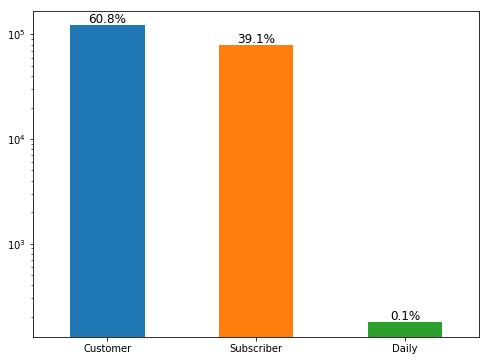

In [53]:
ax = Rentals.Usertype.value_counts().plot(figsize = (8,6), kind="bar",  logy=True, rot = 0);
Usertype_Percentage = Rentals.Usertype.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
for counter, RO in enumerate (ax.patches): #I used RO to represent Rectangle Object instead of p since I used p() for print()
    ax.annotate(str(Usertype_Percentage[counter]), (RO.get_x() +RO.get_width()/2, RO.get_height() * 1.05), ha="center", size=12)
    #display(dir(RO))
    

In [54]:
p(Rentals.Bikeid.value_counts().shape)
Rentals.Bikeid.value_counts().head()

(500,)


70056    575
70383    531
70255    529
70214    527
70233    526
Name: Bikeid, dtype: int64

There are 500 bikes used in my data. When I look at the data above, I think it is useless to look at it for all range of dates, and all stations. This bike usage data shoule make sense and be meaningful only when I associate it with stations and dates. That's what I am going to do next (after "Select a numerical column and calculate the average value (or other mathematical aggregation if average doesn't make sense").)

**Numerical columns analysis**

I think the only numerical column in my data is trip duration.

In [55]:
Tripduration = Rentals.Tripduration
Tripduration.describe()

count    200487.000000
mean       3598.441814
std       10201.839283
min          60.000000
25%         612.000000
50%        1264.000000
75%        3096.000000
max      172671.000000
Name: Tripduration, dtype: float64

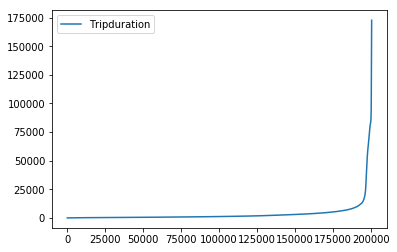

In [56]:
# plot trip duration and reset ascending index instead of using trip id.
# I should have used bar chart, since the x axis is just index. But every time I did kind = "bar" the entire notebook failed for some reason.
Tripduration.sort_values().reset_index().drop("Trip id", axis=1).plot(kind="line")


For the given data and plot above, we can first interpret that this data field is in seconds since the min is at 60. (We know that there is 30min-trip allowed from HealthyRide website.) The mean is then at about 1 hour trip. Median is at 10 mins. Half of the users only bike for under 10 mins. Mean and the median is off by 10 times, the standard deviation is 3 times larger than the smaller half of the data (mean-min). The data is skewed by very much. This is also indicated by the rapid increasing trend at the end of the plot. And when I look back into the data, it says those people used their bike for about 2 days. This could be the user's mistake, forgot to end their trip, or they are just too lazy to bring the bike back. But I am not very bothered by whether I am going to keep these chunk of data since What I am really interested is the dock number at each station is enough. which does not seem like will have dependence on the trip duration.

But I am still going to explore it for a little more. try to find the cutoff points. and see how those data with unreasonable tripduration has any potential patterns.

<a id='TD_graph'></a>

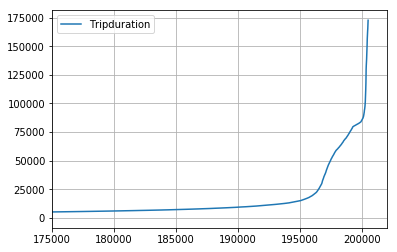

In [57]:
# default figsize
Tripduration.sort_values().reset_index().drop("Trip id", axis=1).plot(kind="line",xlim=[175000,202000]).grid()

200000 on the x axis really looks like the cutoff point. But it seems like there is 3 piece of patternes here, there is a relatively flat region from 175000 to 195000 and then 195000 to 200000 has a some slope but after 200000, The slope arises rapidly.

In [58]:
Rentals.query("Tripduration>85000").shape #dimension

(527, 9)

In [59]:
Rentals.query("Tripduration>85000").describe()

,Bikeid,Tripduration,From station id,To station id
count,527.000000,527.000000,527.000000,527.000000
mean,70245.586338,111671.977230,1023.859583,1024.341556
std,147.584079,28540.661231,16.902742,16.910327
min,70000.000000,85027.000000,1000.000000,1000.000000
25%,70118.000000,88020.500000,1010.000000,1010.000000
50%,70236.000000,96232.000000,1019.000000,1019.000000
75%,70383.000000,136852.000000,1041.000000,1041.500000
max,70500.000000,172671.000000,1061.000000,1061.000000


The result from above cell does not give anything interesting. First, Bikeid, Station id are actually categorical values but it is given in numeric numbers so pandas thought they are numerical values.
The trip duration has a relative stabler statistical reflection, with mean closer to the median and std is smaller than the mean. But nothing interesting here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E18BACE048>,
      dtype=object)

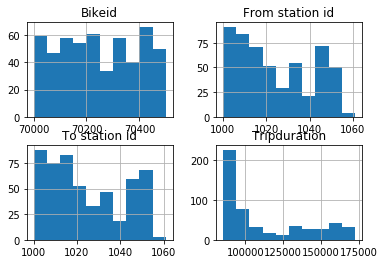

In [60]:
Rentals.query("Tripduration>85000").hist()

(First I did not see `.hist()` function could give histagrams for all of the numeric columns)  
There is one thing interesting, for both from station id and to station id, bin height around 1040, and 1060 and almost equaly low. Which tells, these 2 stations are not used that often for both check in and check out bikes. I wonder if this is the case for all rentals. So next cell is just one cell off the track. And as we can see, it is the same that 1040 and 1060 has a relatively lower height than other stations.  
The trip duration gives some information. It says there are still much more data between 85000 to 100000 (x axis here is the y axis in the [Trip duration graph](#TD_graph), and y axis is the frequency). So I am going to delete this region off and do what I did above again.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E18AEAD5F8>,
      dtype=object)

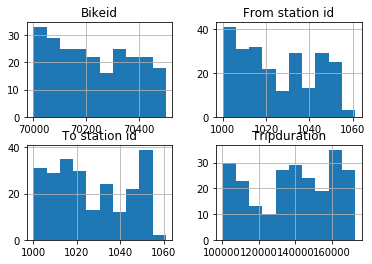

In [61]:
Rentals.query("Tripduration>100000").hist()

Now the frequency of trip duration looks even. The data rage is between 100000 to 172671 (max). Now the question is are these outliers? The additional work I did above does not gives any clue to make the decision. As I said before, it does not bother me since my goal of this homework is to find the if the number of racks at each station to the usage of station ratio is reasonable. The number of racks is fixed at each station. The usage will be determined by the trip start station id and stop station id. So Trip duration does not seem to have any dependency here. So it looks like it does not matter whether they are outliers or not.

### Part 4 Toying around with data

In [62]:
p("Number of bikes:",Rentals.Bikeid.value_counts().shape)
p("Number of racks:", Stations["# of Racks"].sum())

Number of bikes: (500,)
Number of racks: 906


We know that they have 500 bikes and 906 docks from above cell (in the data). 

I am going to make some assumptions, they distributes their bikes according to their station dock number and re-balance the bike daily. I am not going to count the re-balance action in my following analysis because I am going to do my analysis day by day.  
So first, I am going to groupby date.

Next, I am going to look at their start and stop time. I am going to do hour, day of week and month seperately

Start time by day of week. with weekday_name function and treat the data as categorical variables to have it followed the day of week order in common sense.

Text(0,0.5,'Frequency')

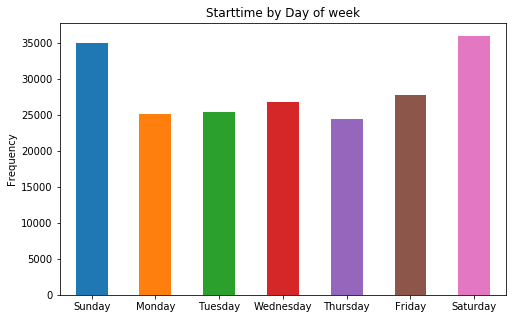

In [63]:
pd.Categorical(Rentals[["Tripduration","Starttime"]]["Starttime"].apply(lambda x:x.weekday_name),categories=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"], ordered=True).value_counts().plot(kind = "bar", rot=0,figsize = (8,5))
plt.title("Starttime by Day of week")
plt.ylabel("Frequency")

Weekends has more check outs than week days


So the usage of during the day mostly stays around 17 to 18 (5pm to 6pm) and follows like a left-skewed normal distribution.

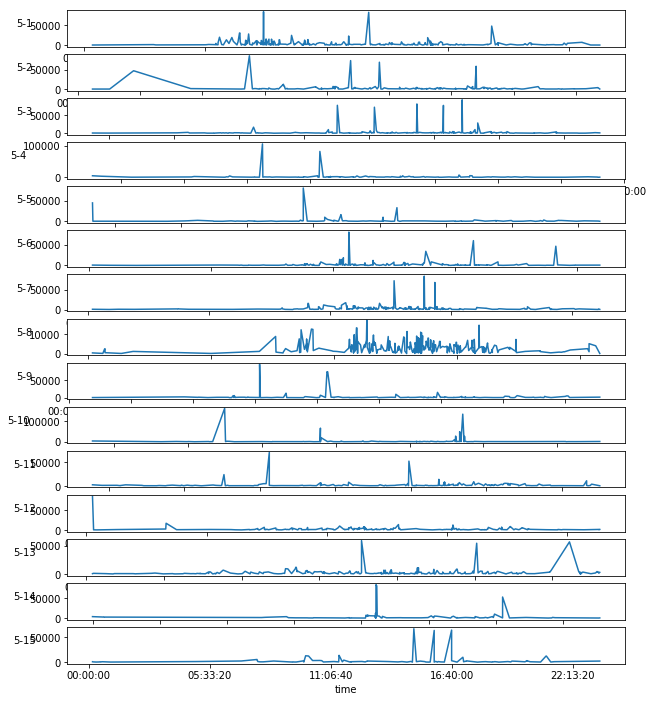

In [64]:
def plot_start_day(y,m,d):   
    time_of_day = Rentals[(Rentals.Starttime).apply(lambda x:(x.month == m and x.year==y and x.day==d))].Starttime.apply(lambda x:x.time())
    #pd.concat([time_of_day, Rentals[(Rentals.Starttime).apply(lambda x:(x.month == m and x.year==y and x.day==d))].Tripduration],axis=1)#.plot(x="Starttime",figsize=(10,5))
    return time_of_day,Rentals[(Rentals.Starttime).apply(lambda x:(x.month == m and x.year==y and x.day==d))].Tripduration
#     .plot(x="Starttime",y="Tripduration",figsize=(10,5),rot=0)
#     ax.set
# plt.subplot(211)
# x,y = plot_start_day(2016,5,31)
# plt.plot(x.values,y.values)
# plt.subplot(2012)
# x,y = plot_start_day(2016,5,30)
# plt.plot(x.values,y.values)
plt.figure(figsize=(10,25))

for i in range (15):
    nrows = 31
    ncols = 1 
    index = i+1
    plt.subplot(nrows, ncols, index)
    x,y = plot_start_day(2016,5,i+1)
    plt.plot(x.values,y.values)
    plt.ylabel("5-"+str(i+1)).set_rotation(0)


There is no unique pattern can be visually catched through out the plotted day. However, The check out data on 5-8 is like crazy. I checked that day, it is a Sunday. 

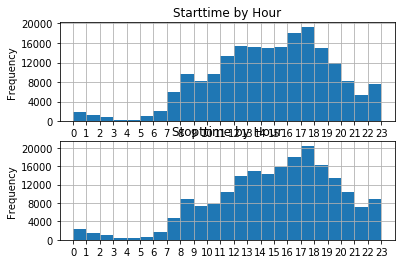

In [65]:
plt.subplot(211)
ax1 = Rentals[["Tripduration","Starttime"]]["Starttime"].apply(lambda x:x.hour).sort_values().hist(bins=23) #(0 to 23) so 23 bins
plt.title("Starttime by Hour")
plt.ylabel("Frequency")
plt.xlim(-1,24)
plt.yticks(np.arange(0,22000,4000))
plt.xticks(np.arange(24));

plt.subplot(212,sharex=ax1)
Rentals[["Tripduration","Stoptime"]]["Stoptime"].apply(lambda x:x.hour).sort_values().hist(bins=23)
plt.title("Stopttime by Hour")
plt.ylabel("Frequency")
plt.xlim(-1,24)
plt.yticks(np.arange(0,22000,4000))
plt.xticks(np.arange(24));

The time distribution of usage looks almost the same for starttime and stop time. I was expecting the Starttime distribution would be shifted to the left compare to the Stoptime.  
But we can still tell the at 5pm to 8pm, there are more returns than check out, and in the morning around 8am to 10 am, there are more check out numbers then returns.

Text(0.5,1,'Starttime by Month')

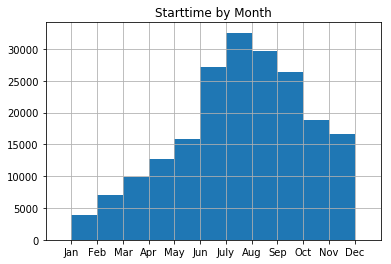

In [66]:
Rentals[["Tripduration","Starttime"]]["Starttime"].apply(lambda x: x.month).sort_values().hist(bins = 11)
plt.xlim(0,13)
plt.xticks(np.arange(1,13,1),["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"]);
plt.title("Starttime by Month")

Summer has much more bike usage then other time during a year. (The Snowy winter in Pittsburgh!)

Text(0.5,1,'Starttime by Year')

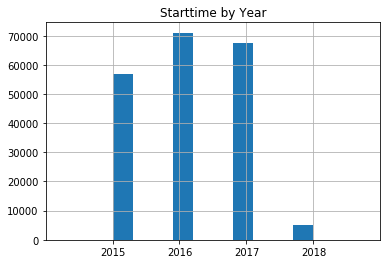

In [67]:
Rentals[["Tripduration","Starttime"]]["Starttime"].apply(lambda x: x.year).sort_values().hist()
plt.xlim(2014,2019)
plt.xticks(np.arange(2015,2019,1));
plt.title("Starttime by Year")

This plot is useless since the size of yearly data is too small. And 2015 and 2018 data is not complete (2015 only has last 3 quarters of data and 2018 only has 1st quarter of data). The rest data only has 2 data points which does not explain any trends.

I found something interesting when I am doing the usage of the data in the next section. There are a number of Users, returns the bikes to the same location. I am curious about what I can find with those users data.

In [317]:
Return_to_same_users = Rentals[Rentals["From station id"] == Rentals["To station id"]]
Return_to_same_users.shape[0]/Rentals.shape[0] 

0.2797887144802406

There are about 28% of the users in the data returned their bike to the same location.

In [373]:
# # of user types.
df=pd.concat([Return_to_same_users.Usertype.value_counts(),Rentals.Usertype.value_counts(),round(Return_to_same_users.Usertype.value_counts()/Rentals.Usertype.value_counts()*100,2)],axis=1)
df.columns=["Same Return", "All Renter","Rate"]
df

,Same Return,All Renter,Rate
Customer,47593,121867,39.05
Subscriber,8435,78442,10.75
Daily,66,178,37.08


So only 10% of the subscribers returns their bike to the same location. And other 2 types of customers has a rate at arount 38%. I think one way to interpret the lower rate of same return for "Subscribers" would be because most of these users subscribed to use it as a alternative way of transportation such as buses or walk. But the other 2 types are more of a tourism purpose, and they don't want to bother finding another station to return the bike. Let's look at Tripduration see if it can give any evidence.

Also From homework 2, I found the daily customer type was abondoned started from 2017 (See next cell). And I assumed it is merged to Subscriber type. But based on this data above, it looks like daily user bahaves like Customers type. So I was probably wrong in HW2. They are probably merged to Customer type.

In [417]:
Rentals.groupby([Rentals.Starttime.dt.year,"Usertype"]).count()

Starttime  Stoptime  Bikeid  Tripduration  \
Starttime Usertype                                                
2015      Customer        34607     34607   34607         34607   
          Daily              83        83      83            83   
          Subscriber      22243     22243   22243         22243   
2016      Customer        43246     43246   43246         43246   
          Daily              95        95      95            95   
          Subscriber      27689     27689   27689         27689   
2017      Customer        42132     42132   42132         42132   
          Subscriber      25330     25330   25330         25330   
2018      Customer         1882      1882    1882          1882   
          Subscriber       3180      3180    3180          3180   

                      From station id  From station name  To station id  \
Starttime Usertype                                                        
2015      Customer              34607              34607          34607   
          Daily                    83                 83             83   
          Subscriber            22243              22243          22243   
2016      Customer              43246              43246          43246   
          Daily                    95                 95             95   
          Subscriber            27689              27689          27689   
2017      Customer              42132              42132          42132   
          Subscriber            25330              25330          25330   
2018      Customer               1882               1882           1882   
          Subscriber             3180               3180           3180   

                      To station name  
Starttime Usertype                     
2015      Customer              34607  
          Daily                    83  
          Subscriber            22243  
2016      Customer              43246  
          Daily                    95  
          Subscriber            27689  
2017      Customer              42132  
          Subscriber            25330  
2018      Customer               1882  
          Subscriber             3180

,Same Return,All Renter
Usertype,,
Customer,98.0,81.0
Daily,300.0,219.0
Subscriber,56.0,27.0


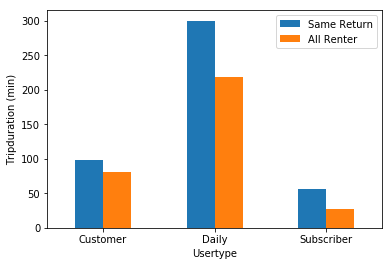

In [410]:
#Tripduration
df=pd.concat([Return_to_same_users.groupby(["Usertype"])["Tripduration"].mean(), Rentals.groupby(["Usertype"])["Tripduration"].mean()],axis=1)
df.columns=["Same Return", "All Renter"]
round(df/60,0).plot(kind="bar",rot=0)
plt.ylabel("Tripduration (min)")
round(df/60,0) #so the result show in mins

The above charts shows the trip duration in minutes. What we first can tell by comparing columns is that Same return users generally have a longer period of trip duration. 
And Subscribers who return to the same location travels twice as longer as all renters. I think this would support the assumption that subscribers use it more like a transportation. These subscribers who return to the same location are probably ride to where they usually go, maybe go to work, and grab something back from work.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3291: UserWarning:

Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.



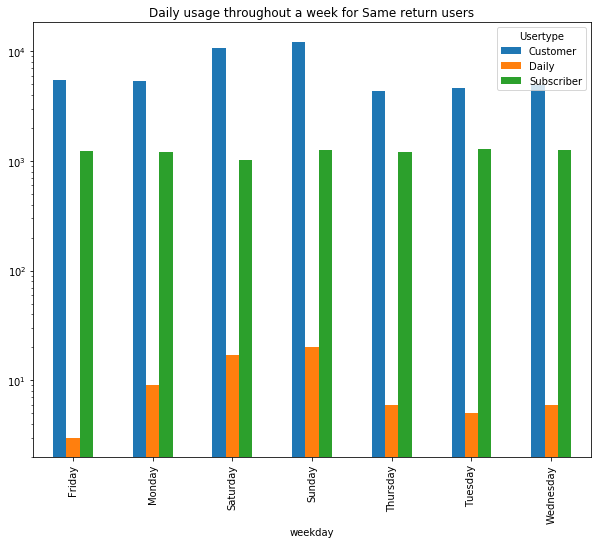

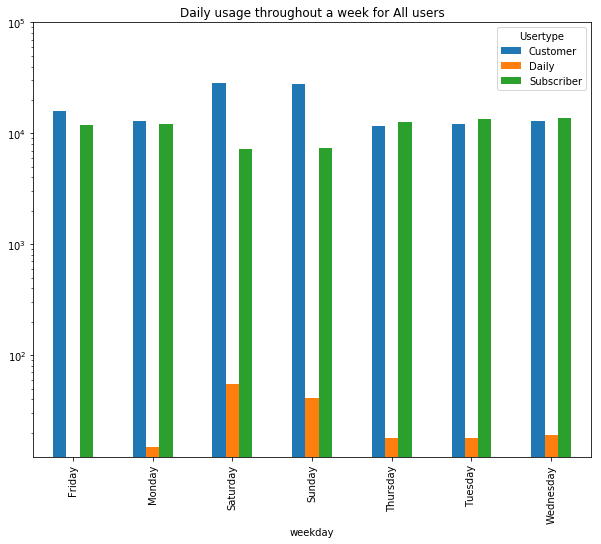

In [484]:
#Comparison of week daily uses for different user type.
Return_to_same_users.groupby([Return_to_same_users.Starttime.dt.weekday_name,"Usertype"]).count()["Tripduration"].unstack(level=1).plot(kind='bar',figsize=(10,8),logy=True)
plt.xlabel("weekday")
plt.title("Daily usage throughout a week for Same return users")
Rentals.groupby([Rentals.Starttime.dt.weekday_name,"Usertype"]).count()["Tripduration"].unstack(level=1).plot(kind='bar',figsize=(10,8),logy=True)
plt.title("Daily usage throughout a week for All users")
plt.ylim(0,100000)
plt.xlabel("weekday");

The 2 graphs is interseting. First I apologize for having the x axis not ordered. The "Saturday" and "Sunday" are in the 3rd and 4th position of the graph. The actual values here will be misleading for comparison since the number of same return users is 4 times less than all users. What I am interested is the trend for each user type. And we can see that for customers and daily users, they have higher usage over the weekends, for both same return users and all users.  
However, The Subscribers trend is strange. First they have lower usage over the weekend for all user type. And for those user who return the bike to the same place, their usage is uniformly distributed over a week.

Now recall from the tripduration cell for same return users. Subscribers trip duration is twice as longer as all Subscribers. So I think subscribers who park their bike to a different stations usually are for transportation to work purpose. For those who return their bike to the same station, are bikers for work out purpose. Since people (bikers) who work out usually perform it on a daily basis and the mean at 56 minutes is a good amount of time to workout whereas 27 minutes is too short for work out, but just the right amount of time for people who use bikes to go to work. 

Now let's look at the usage distribution over time in a day to see if this can support my hypothesis.

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning:

invalid value encountered in less_equal



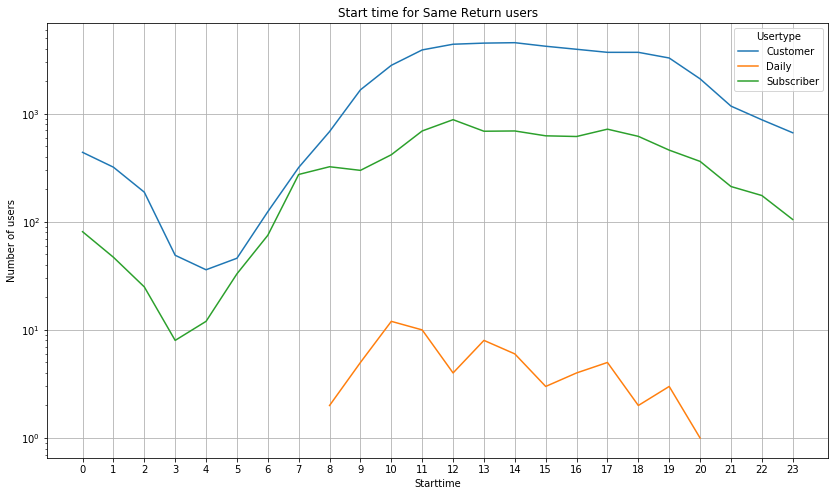

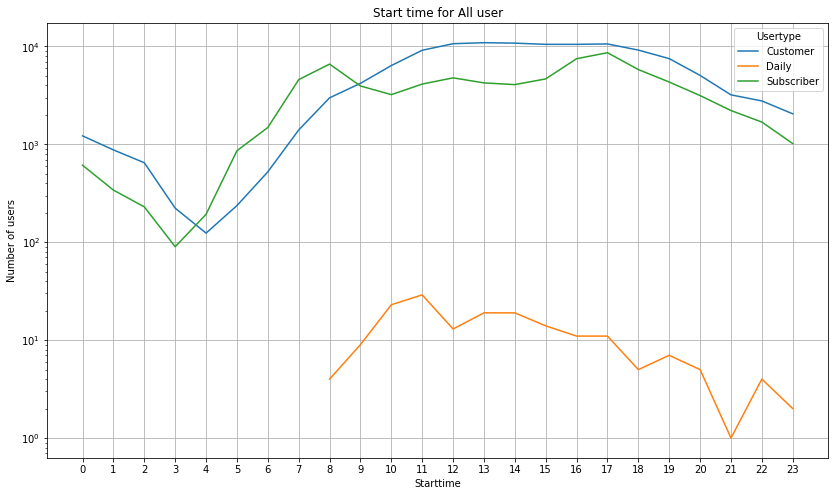

In [485]:
Return_to_same_users.groupby([Return_to_same_users.Starttime.dt.hour,"Usertype"]).count()["Tripduration"].unstack(level=1).plot(kind='line',figsize=(14,8),logy=True).grid()
plt.xticks(range(0,24,1));
plt.title("Start time for Same Return users")
plt.ylabel("Number of users")
Rentals.groupby([Rentals.Starttime.dt.hour,"Usertype"]).count()["Tripduration"].unstack(level=1).plot(kind='line',figsize=(14,8),logy=True).grid()
plt.xticks(range(0,24,1));
plt.title("Start time for All user")
plt.ylabel("Number of users");

I think the above graphs support my hypothesis. The subscribers who returns their bike to the same location has a bell curve during the day with the high usage from 9 am to 9 pm and **one and the only peak occurs at noon**.  
And for all subscribers, it clearly shows there are **2 peaks occurs at 8 am and 5pm**. 

**Summary**

1. There are 500 bikes and 906 Racks in the data
2. For All Users:
    1. There is more weekends usage then week days.
    2. There is no unique day-by-day usage.
    3. The Usage peak occurs at 5pm to 6pm in a day
    4. There is more usage in the summer in a year.
3. For Users return to the same station Vs. All Users:
    1. 28% of the user returns there bikes to the same location. This is more than a quarter of the trip data.
    2. Break down to each user groups: 10% of Subcribers, 37% of daily and 39% of the Customers Returns to the same station.
    3. The trip duration of Same Return users are generally longer than All Users.
    4. Suberscribers who return their bike to the same location are persumed to use the bikes for work out purpose (There are definitely many other purposes. Here I am only propose one of those that I think is very likely matches the purpose of the bike using for this user group).

#### Station usage vs. Num. of docks.   (Is there enough docks for each station?)

Healthy ride has field service crews to move bikes around in order to balance the bike distributions throughout the city bike station, according to [Pittsburgh Post Gazette](http://www.post-gazette.com/local/city/2017/07/17/healthy-ride-pittsburgh-bike-rentals-bikeshare-programs-pa/stories/201707170010), Which mentioned that they have 2 field service crews and one truck to move around bikes.

For the following cells, I am going to look at the daily usage of each station. The usage here I defined is going to beReturns numbers minus check outs numbers. Because Check outs takes bike away and returns gives bikes back. I am going to disregard the starting number of bikes at each station. Since usage only cares about the Users interaction with bike number at each station. So 0 usage rate means the check out and give back rates are balanced, whereas a non zero usage rate means that this station is going to need more service crew to move bikes more frequent.  
Then why do we need docks? The dock number is like a buffer here to buy some time for field service crews to move bikes around the city. The higher usage (Regardless of the sign) at a certain station means it needs a larger size of buffer, the amount of docks.

What I am going to do is:  
First find the daily usage of each staiton and take average of all dates to see the usage at each station.  
Then make a plot of absolute value of usages Vs. dock numbers to tell if any station is short of docks.

In [297]:
Rentals.head()

,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
Trip id,,,,,,,,,
10677131,2015-05-31 06:58:00,2015-05-31 10:09:00,70354,11448,1019,42nd St & Butler St,1019,42nd St & Butler St,Subscriber
10677525,2015-05-31 07:08:00,2015-05-31 07:15:00,70232,452,1001,Forbes Ave & Market Square,1001,Forbes Ave & Market Square,Subscriber
10677899,2015-05-31 07:16:00,2015-05-31 07:25:00,70386,539,1001,Forbes Ave & Market Square,1001,Forbes Ave & Market Square,Customer
10677979,2015-05-31 07:18:00,2015-05-31 11:53:00,70259,16524,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Subscriber
10677999,2015-05-31 07:18:00,2015-05-31 07:52:00,70381,2018,1019,42nd St & Butler St,1001,Forbes Ave & Market Square,Subscriber


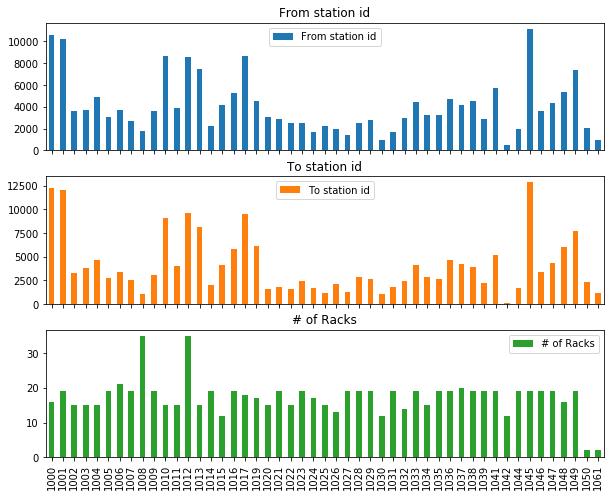

In [256]:
pd.merge(Rentals[["From station id","To station id"]].apply(lambda column:column.value_counts().sort_index()),Stations["# of Racks"].to_frame(),left_index=True, right_index=True).plot(kind="bar",subplots=True,layout=(3,1),sharex=True,figsize = (10,8));

Just by looking at the three plots above, and regardless of the different scale on y axis, It looks like the # of racks is not reasonable to the usage rate. But let's do what I mentioned in the first cell of this section.

In [299]:
Rentals.Starttime.describe()

count                  200487
unique                 159423
top       2015-08-22 14:43:00
freq                        9
first     2015-05-31 06:58:00
last      2018-03-31 23:10:00
Name: Starttime, dtype: object

The data starts at 2015-05-31 and ends at 2018-03-31

I am going to re-structure the data to leaf node hierarchy structure where at the very top is the date and whose node will be all stations for every date. Below, I created 2 data fame with 2 level indexes to achieve the leaf node structure.

In [547]:
Stations_list = []
Usage_dict = {}
#get checkouts/Starttime counts per date with the hierarchy structure
Checkout_bydate = Rentals.groupby([Rentals.Starttime.dt.date,"From station id"]).count().iloc[:,0]
Checkout_bydate

Starttime   From station id
2015-05-31  1000               41
            1001               93
            1002                5
            1003                3
            1004               22
            1005                5
            1006               10
            1009                9
            1010               39
            1011               10
            1013               10
            1015                3
            1016               25
            1017               49
            1019               40
            1027                1
            1029                9
            1036                1
            1039                3
            1050                5
2015-06-01  1000               14
            1001                5
            1002                2
            1003                1
            1004                3
            1005                4
            1006                5
            1007               11
            1009    

In [548]:
#get mean
Checkout_Usage = Checkout_bydate.mean(level=1)
Checkout_Usage

From station id
1000    11.651163
1001    11.049784
1002     4.408642
1003     4.372066
1004     5.660920
1005     3.933938
1006     4.285052
1009     4.290323
1010     9.442266
1011     5.602011
1013     8.737150
1015     5.049577
1016     5.922815
1017     9.385870
1019     5.718274
1027     2.181677
1029     3.467762
1036     5.556080
1039     3.603034
1050     3.045790
1007     3.519531
1014     3.547049
1020     3.437500
1026     2.791086
1044     3.152139
1045    12.733714
1046     4.877717
1012    11.340819
1033     5.192714
1041     6.123391
1049     7.784501
1008     2.575284
1024     2.610092
1032     3.603386
1047     4.838565
1048     6.359618
1025     2.656734
1035     4.062578
1030     1.922619
1031     2.489736
1042     1.440860
1023     3.418256
1034     3.807648
1028     3.223203
1021     3.412811
1022     3.224250
1038     4.936404
1037     5.049577
1061     2.881098
Name: Starttime, dtype: float64

In [538]:
Returns = Rentals.groupby([Rentals.Stoptime.dt.date,"To station id"]).count().iloc[:,0]
Return_Usage = Returns.mean(level=1)
Return_Usage

To station id
1000    12.896118
1001    12.464249
1002     4.184176
1003     4.388439
1004     5.312073
1005     3.694259
1006     3.909302
1007     3.268421
1009     3.726264
1010     9.771305
1011     5.488308
1013     9.299194
1015     5.095771
1016     6.528749
1017    10.545856
1019     6.793370
1027     2.085427
1029     3.340645
1036     5.381503
1039     2.913333
1050     2.930680
1014     3.457483
1020     2.414815
1026     2.779355
1033     5.036900
1044     2.500724
1045    13.795284
1048     7.085580
1049     8.090431
1008     2.115702
1046     4.372727
1047     4.797539
1012    12.408505
1035     3.472368
1041     5.487805
1024     2.546687
1025     1.911263
1030     1.913444
1032     3.117647
1034     3.418440
1031     2.437500
1037     5.037440
1042     1.541667
1023     3.245566
1021     2.484722
1028     3.506234
1022     2.406107
1038     4.379819
1061     3.552716
Name: Starttime, dtype: float64

In [579]:
Usage = Return_Usage-Checkout_Usage
Usage.name = "Usage"
Usage

1000    1.244955
1001    1.414465
1002   -0.224466
1003    0.016374
1004   -0.348847
1005   -0.239679
1006   -0.375750
1007   -0.251110
1008   -0.459582
1009   -0.564059
1010    0.329039
1011   -0.113703
1012    1.067686
1013    0.562045
1014   -0.089566
1015    0.046194
1016    0.605934
1017    1.159987
1019    1.075096
1020   -1.022685
1021   -0.928089
1022   -0.818143
1023   -0.172690
1024   -0.063405
1025   -0.745471
1026   -0.011732
1027   -0.096250
1028    0.283031
1029   -0.127117
1030   -0.009175
1031   -0.052236
1032   -0.485739
1033   -0.155814
1034   -0.389208
1035   -0.590210
1036   -0.174577
1037   -0.012137
1038   -0.556585
1039   -0.689701
1041   -0.635586
1042    0.100806
1044   -0.651416
1045    1.061570
1046   -0.504990
1047   -0.041026
1048    0.725963
1049    0.305930
1050   -0.115110
1061    0.671618
Name: Usage, dtype: float64

count    49.000000
mean     -0.021330
std       0.596960
min      -1.022685
25%      -0.459582
50%      -0.113703
75%       0.283031
max       1.414465
Name: Starttime, dtype: float64

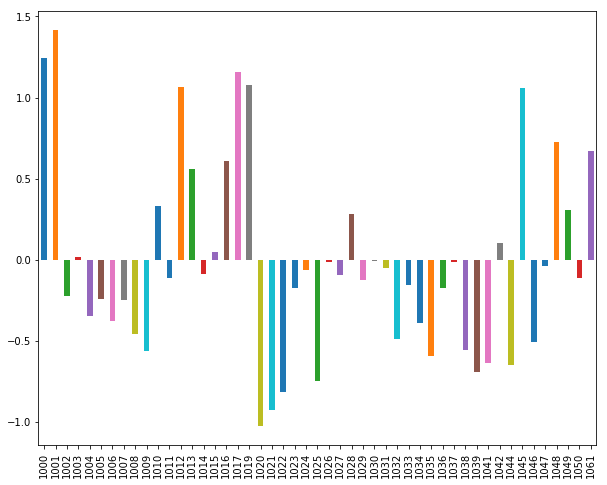

In [546]:
Usage.plot(kind="bar",figsize = (10,8));
Usage.describe()

The above plot shows the usage rate of bikes. Where those bars appears above 0 means it usually needs bike removed, and for those bars under 0 means they are short of bikes

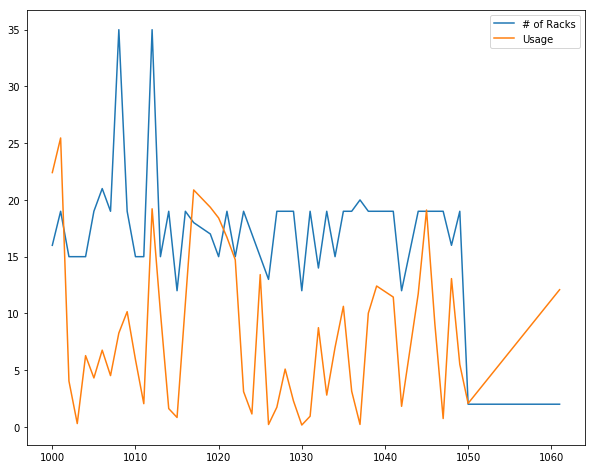

In [582]:
pd.concat([Stations["# of Racks"],Usage.abs()*18],axis=1).dropna().plot(kind="line", figsize=(10,8));

The Usage data is multiplied by 18 to draw roughly into a same scale.  
The graph above does not give a easy picture to tell whether the dock number is reasonable to the usage rate. Let's look at the coorelation of these 2 variables.

In [585]:
pd.concat([Stations["# of Racks"],Usage.abs()*18],axis=1).dropna().corr()

,# of Racks,Usage
# of Racks,1.000000,0.187002
Usage,0.187002,1.000000


Okay, So the correlation rate of 2 variables is 18.7% Which is too low to say that the number of docks is reasonable to usages. These 2 variables should be propotional to each other which should give somewhat a high correlation.

However, this conclusion is drawed based on 

In [91]:
import folium

In [161]:
# Make a data frame with dots to show on the map
Stations.head()

,Station Name,# of Racks,Latitude,Longitude
Station #,,,,
1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679
1001,Forbes Ave & Market Square,19,40.440877,-80.003080
1002,Third Ave & Wood St,15,40.439030,-80.001860
1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375
1004,First Ave & B St (T Station),15,40.435887,-79.997102


In [182]:
# Make an empty map
m = folium.Map(location=[40.44,-79.97], tiles='cartodbpositron', zoom_start=13)
print()

Stations.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=row["# of Racks"]/2,  popup=folium.Popup(row["Station Name"] + "\n# of Racks:"+str(row["# of Racks"]), parse_html=True), fill=True, fill_color='#3186cc',)
                                             .add_to(m), axis=1)
m
# # I can add marker one by one on the map
# for i in range(0,len(Stations)):
#    folium.Circle(
#     radius=100,
#     location=[45.5244, -122.6699],
#     popup='The Waterfront',
#     color='crimson',
#     fill=False,
#     ).add_to(m)
 
# # Save it as html
# m.save('mymap.html')